<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1116]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('...', sep='\t')

columns_list = list(data.columns)
display(columns_list)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Сделаем переименование полей `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` для приведения имён к нижнему регистру и разделения подчёркиванием отдельных слов:

In [1117]:
columns_list[-6] = 'city_centers_nearest'
columns_list[-3] = 'ponds_around_3000'
columns_list[-5] = 'parks_around_3000'
data.columns = columns_list
display(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Посмотрим на первые 5 строк таблицы, а также вызовем метод `.info()` для оценки количества пропущенных значений в наборе данных:

In [1118]:
display(data.head())
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

### Вывод

Файл с данными представлен в формате CSV с использованием табуляции в качестве разделителя полей. В наборе данных из `22` столбцов всего содержится `23699` строк (объявлений о продаже квартир), при этом многие столбцы содержат пропуски, а именно:

- `locality_name`
- `floors_total`
- `ceiling_height`
- `living_area`
- `is_apartment`
- `kitchen_area`
- `balcony`
- `airports_nearest`
- `city_centers_nearest`
- `parks_around_3000`
- `ponds_around_3000`
- `ponds_nearest`
- `days_exposition`

С заполнения имеющихся пропусков и начнём предобработку данных.

## Предобработка данных

Начнём последовательно рассматривать столбцы с пропусками и применим ту или иную стратегию для исправления пропусков.

Создадим вспомогательную функцию для печати количества пропусков:

In [1119]:
def print_na_count_for_column(df, column_name):
    """ Печатает количество пропущенных значений для столбца 'column_name' в DataFrame-е 'df' 
    """
    print(f'Количество пропусков в столбце "{column_name}" равно: {df[column_name].isna().sum()}')

### Пропуски в столбце `locality_name`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1120]:
print_na_count_for_column(data, 'locality_name')

display(data[data['locality_name'].isna()])

Количество пропусков в столбце "locality_name" равно: 49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.000,81.700,2016-04-15T00:00:00,3,3.550,5.000,50.800,2,NaN,...,8.800,0.000,NaN,23478.000,4258.000,0.000,NaN,0.000,NaN,147.000
2033,6,5398000.000,80.000,2017-05-30T00:00:00,3,NaN,4.000,42.600,2,NaN,...,18.600,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000
2603,20,3351765.000,42.700,2015-09-20T00:00:00,1,NaN,24.000,15.600,3,NaN,...,10.700,0.000,NaN,22041.000,17369.000,0.000,NaN,1.000,374.000,276.000
2632,2,5130593.000,62.400,2015-10-11T00:00:00,2,NaN,24.000,33.100,21,NaN,...,8.200,0.000,NaN,22041.000,17369.000,0.000,NaN,1.000,374.000,256.000
3574,10,4200000.000,46.500,2016-05-28T00:00:00,2,NaN,5.000,30.800,5,NaN,...,6.500,0.000,NaN,27419.000,8127.000,0.000,NaN,1.000,603.000,45.000
4151,17,17600000.000,89.500,2014-12-09T00:00:00,2,3.000,8.000,39.620,7,NaN,...,13.380,0.000,NaN,25054.000,3902.000,1.000,485.000,3.000,722.000,869.000
4189,7,9200000.000,80.000,2015-12-10T00:00:00,3,4.000,4.000,52.300,3,False,...,10.400,0.000,NaN,21774.000,3039.000,1.000,690.000,1.000,953.000,223.000
4670,1,5500000.000,83.000,2015-08-14T00:00:00,3,NaN,7.000,NaN,6,NaN,...,NaN,0.000,NaN,26534.000,5382.000,1.000,446.000,1.000,376.000,350.000
5343,19,13540000.000,85.500,2016-01-20T00:00:00,3,NaN,7.000,59.100,5,False,...,8.300,4.000,NaN,10556.000,9538.000,1.000,67.000,0.000,NaN,303.000
5707,7,3700000.000,30.000,2016-04-29T00:00:00,1,NaN,24.000,20.000,23,NaN,...,NaN,0.000,NaN,21460.000,16788.000,0.000,NaN,1.000,170.000,49.000


Пропусков немного, всего `49`, тем не менее, попробуем использовать некоторую стратегию для заполнения пропусков хотя бы в части из них. Будем опираться на столбец `city_centers_nearest`, который задаёт расстояние от продаваемой квартиры до центра города.

Поймём, что понимается под центом - Санкт-Петербург или центр регионального населённого пункта, где продаётся та или иная квартира.

Для этого выборочно осмотрим квартиры **вне** Санкт-Петербурга, для которых есть **непустое** значение категории `city_centers_nearest`:

In [1121]:
display(data[(~data['city_centers_nearest'].isna()) & (data['locality_name'] != 'Санкт-Петербург')])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
11,9,3300000.000,44.000,2018-08-27T00:00:00,2,NaN,5.000,31.000,4,False,...,6.000,1.000,Ломоносов,48252.000,51677.000,0.000,NaN,0.000,NaN,7.000
13,20,3550000.000,42.800,2017-07-01T00:00:00,2,2.560,5.000,27.000,5,NaN,...,5.200,1.000,Петергоф,37868.000,33058.000,1.000,294.000,3.000,298.000,366.000
14,1,4400000.000,36.000,2016-06-23T00:00:00,1,NaN,6.000,17.000,1,NaN,...,8.000,0.000,Пушкин,20782.000,30759.000,0.000,NaN,1.000,96.000,203.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23667,14,9990000.000,90.000,2017-01-23T00:00:00,3,3.060,17.000,55.000,9,False,...,11.000,2.000,Сестрорецк,56343.000,33272.000,0.000,NaN,1.000,545.000,86.000
23669,8,3000000.000,34.100,2017-11-10T00:00:00,1,NaN,9.000,17.000,3,NaN,...,9.000,1.000,Колпино,24687.000,30473.000,0.000,NaN,1.000,741.000,74.000
23678,10,3500000.000,43.000,2016-05-19T00:00:00,2,2.500,3.000,26.100,2,False,...,4.900,1.000,Пушкин,15823.000,27977.000,0.000,NaN,1.000,1134.000,252.000
23685,15,2490000.000,31.000,2019-01-24T00:00:00,1,2.500,5.000,17.300,5,NaN,...,5.600,1.000,Ломоносов,48393.000,51818.000,0.000,NaN,0.000,NaN,NaN


Судя по объявлениям о продаже в городах Ломоносов и Пушкин, значениям расстояния до центра для них около 50 км и 30 км соответственно, а также учитывая небольшой размер данных городов, можно сделать следующий вывод:

        Значение `city_centers_nearest` всегда задаёт расстояние от продаваемой квартиры до центра
        Санкт-Петербурга, в том числе и для квартир, продаваемых в Ленинградской области

Используя данный вывод, пробуем заменить пропущенные значения в столбце `locality_name` используя следующую идею: рассмотрим все продаваемые квартиры, расположенные вне Санкт-Петербурга и оценим распределение расстояния до центра (`city_centers_nearest`) для таких квартир; тогда **минимальное** расстояние от квартиры **вне** Санкт-Петербурга **до центра** (т.е. самого Санкт-Петербурга) будем трактовать как своего рода _граничное значение удалённости_; квартиры, которые имеют пропуски в столбце `locality_name`, но для которых расстояние до центра непусто и меньше данного значения, будем относить также к Санкт-Петербургу.

Найдём это минимальное значение:

In [1122]:
(
data[
        (data['locality_name'] != 'Санкт-Петербург') &
        (~data['locality_name'].isna()) &
        (~data['city_centers_nearest'].isna())]
    ['city_centers_nearest'].describe()
)

count    2479.000
mean    30600.553
std      9071.837
min     17012.000
25%     24740.000
50%     30371.000
75%     33719.000
max     65968.000
Name: city_centers_nearest, dtype: float64

Рассматривая характеристики распределения выше, можно видеть, что минимальным значением является `17 км` (`17012`).

Также оценим распределение удалённости от центра для квартир в Санкт-Петербурге:

In [1123]:
(
data[
    (data['locality_name'] == 'Санкт-Петербург') &
    (~data['locality_name'].isna()) &
    (~data['city_centers_nearest'].isna())]
    ['city_centers_nearest'].describe()
)

count   15660.000
mean    11601.292
std      4842.035
min       181.000
25%      8327.000
50%     12244.500
75%     14943.000
max     29493.000
Name: city_centers_nearest, dtype: float64

Видно, что `75%` квартир в Санкт-Петербурге расположены ближе чем в `15 км` (`14943`) от центра, и `25%` - дальше. Значения `15 км` и `17 км` можно считать довольно близкими, поэтому за _граничное значение удалённости_ примем наше найденное значение в `17 км` за вычетом некоторого отступа в `1 км` (для большей уверенности) и округлением, т.е. `16 км`.

Оценим, сколько квартир среди тех, что имеют пропуск в `locality_name`, находятся в пределах данного граничного значения удалённости:

In [1124]:
data[(data['locality_name'].isna()) & (data['city_centers_nearest'] < 16000)].shape[0]

28

Таких кватрир `28`. Таким образом, останется только `21` квартира (`49 - 28`) для которой нельзя использовать данный способ заполнения пропусков. Учитывая, что `21` квартира составляет только `0.08%` (`21/23699*100`), будем удалять строки с такими квартирами из данной таблицы.

Теперь выполним замену пропущенных значений в `locality_name` для данных `28` квартир, используя в качестве значения `Санкт-Петербург`:

In [1125]:
data.loc[data['city_centers_nearest'] < 16000, 'locality_name'] =\
    data[data['city_centers_nearest'] < 16000]['locality_name'].fillna('Санкт-Петербург')
    
print_na_count_for_column(data, 'locality_name')

Количество пропусков в столбце "locality_name" равно: 21


In [1126]:
data = data.dropna(subset=['locality_name'])

print_na_count_for_column(data, 'locality_name')

Количество пропусков в столбце "locality_name" равно: 0


### Пропуски в столбце `floors_total`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1127]:
print_na_count_for_column(data, 'floors_total')

display(data[data['floors_total'].isna()])

Количество пропусков в столбце "floors_total" равно: 85


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.000,65.200,2018-10-02T00:00:00,2,NaN,NaN,30.800,4,NaN,...,12.000,NaN,Санкт-Петербург,39197.000,12373.000,1.000,123.000,0.000,NaN,49.000
237,4,2438033.000,28.100,2016-11-23T00:00:00,1,NaN,NaN,20.750,1,NaN,...,NaN,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,251.000
457,4,9788348.000,70.800,2015-08-01T00:00:00,2,NaN,NaN,38.400,12,NaN,...,10.630,0.000,Санкт-Петербург,37364.000,8322.000,2.000,309.000,2.000,706.000,727.000
671,4,6051191.000,93.600,2017-04-06T00:00:00,3,NaN,NaN,47.100,8,NaN,...,16.800,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,123.000
1757,5,3600000.000,39.000,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,77.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.000,63.500,2017-05-24T00:00:00,2,2.800,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.000,15363.000,0.000,NaN,1.000,853.000,512.000
22656,4,4574160.000,64.500,2017-04-02T00:00:00,2,NaN,NaN,31.700,20,NaN,...,14.400,0.000,Санкт-Петербург,22041.000,17369.000,0.000,NaN,1.000,374.000,127.000
22808,0,14569263.000,110.400,2016-11-20T00:00:00,3,NaN,NaN,45.380,6,NaN,...,23.420,0.000,Санкт-Петербург,19095.000,4529.000,0.000,NaN,0.000,NaN,260.000
23590,0,21187872.000,123.300,2017-04-25T00:00:00,3,NaN,NaN,50.400,18,NaN,...,23.600,0.000,Санкт-Петербург,19095.000,4529.000,0.000,NaN,0.000,NaN,104.000


Для заполнения пропусков в данном столбце создадим группировку по столбцу `floor` (этаж продаваемой квартиры). Тогда для присвоения пропущенной этажности дома некоторой продаваемой квартиры будем обращаться к данной группировке по значению этажа квартиры `F`; группировка вернёт нам среднее значения этажности всех тех домов, в которых имеются в продаже квартиры на том же самом этаже `F`.

Выполним заполнение пропущенных значений, передавая группировку аргументом в функцию `Series.fillna()`. Убедимся, что пропуски были исправлены.

In [1128]:
data['floors_total'] = data['floors_total']\
        .fillna(data.groupby('floor')['floors_total']\
        .transform(lambda x: round(x.mean())))

print_na_count_for_column(data, 'floors_total')

Количество пропусков в столбце "floors_total" равно: 0


### Пропуски в столбце `ceiling_height`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1129]:
print_na_count_for_column(data, 'ceiling_height')

display(data[data['ceiling_height'].isna()])

Количество пропусков в столбце "ceiling_height" равно: 9179


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,NaN,12.000,14.400,5,NaN,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,NaN,26.000,10.600,6,NaN,...,14.400,1.000,посёлок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.000,39.000,2017-12-16T00:00:00,1,NaN,9.000,20.000,6,NaN,...,11.000,2.000,Санкт-Петербург,40837.000,16704.000,0.000,NaN,0.000,NaN,38.000
23690,3,5500000.000,52.000,2018-07-19T00:00:00,2,NaN,5.000,31.000,2,NaN,...,6.000,NaN,Санкт-Петербург,20151.000,6263.000,1.000,300.000,0.000,NaN,15.000
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,NaN,5.000,17.500,4,NaN,...,6.000,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.000
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,NaN,5.000,38.000,4,NaN,...,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000


Пропусков большое количество, `9179`. Попробуем оценить распределение значений данной категории:

In [1130]:
data['ceiling_height'].describe()

count   14499.000
mean        2.772
std         1.261
min         1.000
25%         2.520
50%         2.650
75%         2.800
max       100.000
Name: ceiling_height, dtype: float64

Среднее значение и медиана высоты потолков выглядят реалистичными, `2.72` и `2.52` метра. Тем не менее, видны выбивающиеся значения в виде минимума в `1` метр и максимума в `100` метров.

Заполним пропуски в данном столбце `ceiling_height`, используя вспомогательную группировку по общей этажности домов (`floors_total`). Для заполнения пропуска будем ориентироваться на медианное значение в той группе из группировки, к которой относится данная квартира с пропуском:

In [1131]:
data['ceiling_height'] = data['ceiling_height']\
    .fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

print_na_count_for_column(data, 'ceiling_height')

Количество пропусков в столбце "ceiling_height" равно: 1


Одна квартира всё же осталась с пропуском - заполним его средним значением по столбцу `ceiling_height` по всему набору данных:

In [1132]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

print_na_count_for_column(data, 'ceiling_height')

Количество пропусков в столбце "ceiling_height" равно: 0


### Пропуски в столбце `living_area`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1133]:
print_na_count_for_column(data, 'living_area')

display(data[data['living_area'].isna()])

Количество пропусков в столбце "living_area" равно: 1900


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.600,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.750,24.000,NaN,22,NaN,...,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,2.750,22.000,NaN,3,NaN,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.000,80.300,2018-07-03T00:00:00,3,2.700,12.000,NaN,5,NaN,...,NaN,NaN,Колпино,27933.000,33719.000,0.000,NaN,2.000,562.000,60.000
23663,12,6400000.000,88.000,2018-01-12T00:00:00,4,2.550,10.000,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.000,13943.000,0.000,NaN,2.000,844.000,59.000
23670,9,2450000.000,45.600,2018-02-08T00:00:00,1,2.800,9.000,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23679,0,2500000.000,35.000,2017-12-08T00:00:00,1,2.550,9.000,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.000


Будем заполнять `1900` этих пропусков аналогичным способом - на основании группировки. На этот раз сгруппируемся по столбцу `rooms`:

In [1134]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('mean'))
                                                 
print_na_count_for_column(data, 'living_area')

Количество пропусков в столбце "living_area" равно: 0


### Пропуски в столбце `is_apartment`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1135]:
print_na_count_for_column(data, 'is_apartment')

display(data[data['is_apartment'].isna()])

Количество пропусков в столбце "is_apartment" равно: 20909


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.750,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.550,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.600,14.000,47.385,9,NaN,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,NaN,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,NaN,...,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.000,76.750,2017-03-28T00:00:00,2,3.000,17.000,31.737,12,NaN,...,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000


Среди тех квартир, которые имеют непустое значение категории `is_apartment`, оценим распределение категории:

<AxesSubplot:>

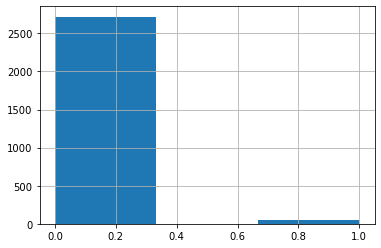

In [1136]:
data[~data['is_apartment'].isna()]['is_apartment'].astype(int).hist(bins=3)

In [1137]:
display(data[data['is_apartment'] == True].shape[0])
display(data[data['is_apartment'] == False].shape[0])

50

2719

Можно видеть, что апартаментами являются лишь `1.62%` квартир (`44 / 2703 * 100)`.

Исходя из этого, заполним пропуски для данной категории `is_apartment` значением `False`:

In [1138]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print_na_count_for_column(data, 'is_apartment')

Количество пропусков в столбце "is_apartment" равно: 0


### Пропуски в столбце `kitchen_area`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1139]:
print_na_count_for_column(data, 'kitchen_area')

display(data[data['kitchen_area'].isna()])

Количество пропусков в столбце "kitchen_area" равно: 2273


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.600,14.000,47.385,9,False,...,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,17.893,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
37,10,1990000.000,45.800,2017-10-28T00:00:00,2,2.500,5.000,31.737,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.000
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,2.750,22.000,17.893,3,False,...,NaN,1.000,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN
59,15,6300000.000,46.500,2017-03-06T00:00:00,1,2.700,13.000,17.893,13,False,...,NaN,NaN,Санкт-Петербург,11125.000,14501.000,0.000,NaN,0.000,NaN,336.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.000,40.500,2016-09-08T00:00:00,1,2.560,18.000,19.600,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.000
23663,12,6400000.000,88.000,2018-01-12T00:00:00,4,2.550,10.000,66.983,1,False,...,NaN,NaN,Санкт-Петербург,33642.000,13943.000,0.000,NaN,2.000,844.000,59.000
23670,9,2450000.000,45.600,2018-02-08T00:00:00,1,2.800,9.000,17.893,2,False,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23679,0,2500000.000,35.000,2017-12-08T00:00:00,1,2.550,9.000,17.893,4,False,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.000


На первый взгляд кажется, что площадь кухни (`kitchen_area`) может находиться в зависимости от общей (`total_area`) или жилой (`living_area`) площади для данной квартиры.

Проверим это, построив две соответствующие диаграммы рассеяния:

<AxesSubplot:title={'center':'Зависимость между общей площадью и площадью кухни'}, xlabel='Общая площадь', ylabel='Площадь кухни'>

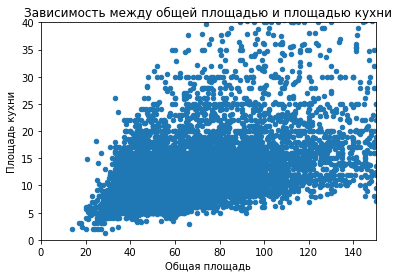

In [1140]:
data.plot(kind='scatter', x='total_area', y='kitchen_area', xlim=[0, 150], ylim=[0, 40],
         xlabel='Общая площадь', ylabel='Площадь кухни',
         title='Зависимость между общей площадью и площадью кухни')

<AxesSubplot:title={'center':'Зависимость между жилой площадью и площадью кухни'}, xlabel='Жилая площадь', ylabel='Площадь кухни'>

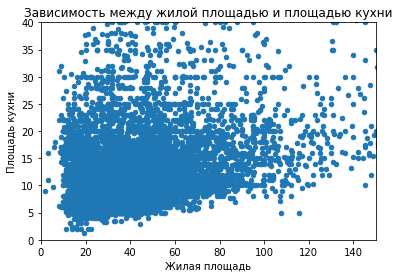

In [1141]:
data.plot(kind='scatter', x='living_area', y='kitchen_area', xlim=[0, 150], ylim=[0, 40],
         xlabel='Жилая площадь', ylabel='Площадь кухни',
         title='Зависимость между жилой площадью и площадью кухни')

Судя по графикам, обе зависимости выглядят довольно слабыми, не очень однозначными.

Поэтому для заполнения пропусков в данной категории будем вновь пробовать использовать группировку по некоторой категории с вычислением медианного значения по группам, которое и будет использоваться для заполнения пропусков.

В качестве категории для группировки выберем общую этажность дома (`floors_total`):

<AxesSubplot:title={'center':'Медианные значения площади кухни для группировки по этажности дома'}, xlabel='Группы по этажности', ylabel='Медиана площади кухни для группы'>

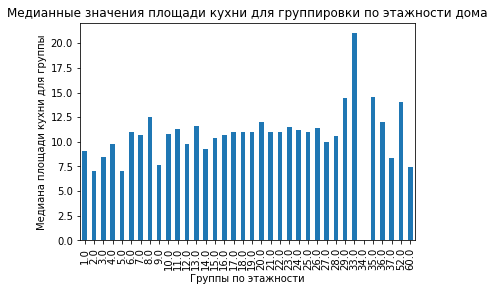

In [1142]:
data.groupby('floors_total')['kitchen_area'].agg('median').plot(kind='bar',
    title='Медианные значения площади кухни для группировки по этажности дома',
    xlabel='Группы по этажности',
    ylabel='Медиана площади кухни для группы')

Как и ранее, делаем заполнение пропусков:

In [1143]:
data['kitchen_area'] =\
    data['kitchen_area'].fillna(data.groupby('floors_total')['kitchen_area'].transform('median'))

In [1144]:
print_na_count_for_column(data, 'kitchen_area')

Количество пропусков в столбце "kitchen_area" равно: 1


Одну оставшуюся квартиру с пропуском заполним медианной площадью кухни, подсчитанной для всего набора данных:

In [1145]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

print_na_count_for_column(data, 'kitchen_area')

Количество пропусков в столбце "kitchen_area" равно: 0


### Пропуски в столбце `balcony`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1146]:
print_na_count_for_column(data, 'balcony')

display(data[data['balcony'].isna()])

Количество пропусков в столбце "balcony" равно: 11513


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,False,...,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,False,...,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,9.100,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,8.810,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
10,5,5050000.000,39.600,2017-11-16T00:00:00,1,2.670,12.000,20.300,3,False,...,8.500,NaN,Санкт-Петербург,38357.000,13878.000,1.000,310.000,2.000,553.000,137.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,6.000,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.000
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,False,...,13.830,NaN,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,8.500,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выполним группировку набора данных по столбцу `balcony` и рассмотрим некоторые статистические показатели для категорий с количеством комнат (`rooms`), общей и жилой площадью (`total_area` и `living_area`), этажом продаваемой квартиры (`floor`):

In [1147]:
data.groupby('balcony').agg(
    {'rooms': ['count', 'median'],
     'total_area': ['median'],
     'living_area': ['median'],
     'floor': ['median']})

rooms        total_area living_area  floor
        count median     median      median median
balcony                                           
0.000    3748      2     52.300      30.600      4
1.000    4191      2     48.500      29.700      5
2.000    3658      2     52.000      29.000      6
3.000      81      3     74.400      46.400      5
4.000     183      3     75.000      43.600      5
5.000     304      3     71.800      42.350      7

<a id='balcony_stranges'></a>

Результаты в таблице вызывают сомнения в правдоподобности, в частности:

- количество квартир без балкона очень велико (`3738`) и почти равно с количеству квартир с одним балконом (`4173`): обычно квартиры без балконов бывают приемущественно на первом этаже, в то время как этажей выше первого в домах существенно больше, и чем выше этажность, тем большее количество квартир с балконом можно ожидать; медианное значение этажа для квартир без балкона равно `4`;


- количество квартир с двумя балконами также очень велико (`3644`), и при этом медианное значение количества комнат для таких квартир равно лишь только `2`, что вызывает недоверие;


- наконец, крайне настораживает значительное количество однокомнатных квартир с двумя балконами (см. клетку ниже).

In [1148]:
print(f"Однокомнатных квартир с 2 балконами: {data[(data['balcony'] == 2) & (data['rooms'] == 1)].shape[0]}")

Однокомнатных квартир с 2 балконами: 1484


Принимая во внимание указанные отклонения, переприсвоим всю категорию `balcony` согласно следующему правилу:

        Если квартира находится на 1 этаже, считаем, что она не имеет балкона.
        В противном случае квартира имеет 1 балкон.

In [1149]:
data['balcony'] = data.apply(lambda row: 0 if row['floor'] == 1 else 1, axis=1)

Наконец, убедимся, что пропусков не осталось:

In [1150]:
print_na_count_for_column(data, 'balcony')

Количество пропусков в столбце "balcony" равно: 0


### Пропуски в столбце `airports_nearest`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1151]:
print_na_count_for_column(data, 'airports_nearest')

display(data[data['airports_nearest'].isna()])

Количество пропусков в столбце "airports_nearest" равно: 5534


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,9.100,1,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.000
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,8.810,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.000
12,10,3890000.000,54.000,2016-06-30T00:00:00,2,2.550,5.000,30.000,5,False,...,9.000,1,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.000
22,20,5000000.000,58.000,2017-04-24T00:00:00,2,2.750,25.000,30.000,15,False,...,11.000,1,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.000
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,17.893,2,False,...,7.600,1,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.000,62.800,2018-09-18T00:00:00,4,2.500,5.000,45.500,3,False,...,5.500,1,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,6.000,1,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.000
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,8.500,1,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,8.500,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Попробуем и здесь воспользоваться группировкой для заполнения пропусков - будем делать группировку по населённому пункту и находить в каждой из таких групп среднее или медианное значение расстояния до аэропорта:

In [1152]:
airports_groupby = data[~data['airports_nearest'].isnull()].groupby('locality_name')['airports_nearest']
airports_groupby.agg(['count', 'median'])
print(f'Количество населённых пунктов с проставленным расстоянием до ближайшего аэропорта равно \
      {len(airports_groupby.groups)}')

Количество населённых пунктов с проставленным расстоянием до ближайшего аэропорта равно       28


Поскольку расстояние до ближайшего аэропорта проставлено лишь у небольшого количества наслелённых пунктов, то мы сможем выполнить заполнение пропусков таким способом только у `28` населённых пунктов.

Для ликвидации остальных пропусков будем выставлять им медианное значение, рассчитанное для всех городов Ленинградской области за исключением Санкт-Петербурга:

In [1153]:
dist_to_airport_from_suburbs =\
    data[data['locality_name'] != 'Санкт-Петербург']['airports_nearest'].median()

print(f'Медианное расстояние от областных населённых пунктов до аэропорта равно {dist_to_airport_from_suburbs}')

Медианное расстояние от областных населённых пунктов до аэропорта равно 26739.5


Убеждаемся, что пропусков не осталось:

In [1154]:
data['airports_nearest'] = data['airports_nearest'].fillna(
    data.groupby('locality_name')['airports_nearest'].transform('median'))
print_na_count_for_column(data, 'airports_nearest')

data['airports_nearest'] = data['airports_nearest'].fillna(
    dist_to_airport_from_suburbs)
print_na_count_for_column(data, 'airports_nearest')

Количество пропусков в столбце "airports_nearest" равно: 5386
Количество пропусков в столбце "airports_nearest" равно: 0


### Пропуски в столбце `city_centers_nearest`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1155]:
print_na_count_for_column(data, 'city_centers_nearest')

display(data[data['city_centers_nearest'].isna()])

Количество пропусков в столбце "city_centers_nearest" равно: 5511


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,9.100,1,городской посёлок Янино-1,26739.500,NaN,NaN,NaN,NaN,NaN,55.000
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,8.810,1,посёлок Мурино,26739.500,NaN,NaN,NaN,NaN,NaN,189.000
12,10,3890000.000,54.000,2016-06-30T00:00:00,2,2.550,5.000,30.000,5,False,...,9.000,1,Сертолово,26739.500,NaN,NaN,NaN,NaN,NaN,90.000
22,20,5000000.000,58.000,2017-04-24T00:00:00,2,2.750,25.000,30.000,15,False,...,11.000,1,деревня Кудрово,26739.500,NaN,NaN,NaN,NaN,NaN,60.000
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,17.893,2,False,...,7.600,1,Коммунар,26739.500,NaN,NaN,NaN,NaN,NaN,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.000,62.800,2018-09-18T00:00:00,4,2.500,5.000,45.500,3,False,...,5.500,1,посёлок Дзержинского,26739.500,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,6.000,1,Тихвин,26739.500,NaN,NaN,NaN,NaN,NaN,413.000
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,8.500,1,Тосно,26739.500,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,8.500,0,село Рождествено,26739.500,NaN,NaN,NaN,NaN,NaN,NaN


In [1156]:
data['city_centers_nearest']

0       16028.000
1       18603.000
2       13933.000
3        6800.000
4        8098.000
           ...   
23694    4232.000
23695         NaN
23696         NaN
23697   10364.000
23698         NaN
Name: city_centers_nearest, Length: 23678, dtype: float64

In [1157]:
centers_groupby = data[~data['city_centers_nearest'].isnull()].groupby('locality_name')['city_centers_nearest']
centers_groupby.agg(['count', 'median'])
print(f'Количество населённых пунктов с проставленным расстоянием до центра равно \
      {len(centers_groupby.groups)}')

Количество населённых пунктов с проставленным расстоянием до центра равно       28


In [1158]:
dist_to_center_from_suburbs =\
    data[data['locality_name'] != 'Санкт-Петербург']['city_centers_nearest'].median()

print(f'Медианное расстояние от областных населённых пунктов до центра равно {dist_to_center_from_suburbs}')

Медианное расстояние от областных населённых пунктов до центра равно 30371.0


In [1159]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
    data.groupby('locality_name')['city_centers_nearest'].transform('median'))
print_na_count_for_column(data, 'city_centers_nearest')

data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
    dist_to_center_from_suburbs)
print_na_count_for_column(data, 'city_centers_nearest')

Количество пропусков в столбце "city_centers_nearest" равно: 5386
Количество пропусков в столбце "city_centers_nearest" равно: 0


### Пропуски в столбце `parks_around_3000`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1160]:
print_na_count_for_column(data, 'parks_around_3000')

display(data[data['parks_around_3000'].isna()])

Количество пропусков в столбце "parks_around_3000" равно: 5510


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,9.100,1,городской посёлок Янино-1,26739.500,30371.000,NaN,NaN,NaN,NaN,55.000
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,8.810,1,посёлок Мурино,26739.500,30371.000,NaN,NaN,NaN,NaN,189.000
12,10,3890000.000,54.000,2016-06-30T00:00:00,2,2.550,5.000,30.000,5,False,...,9.000,1,Сертолово,26739.500,30371.000,NaN,NaN,NaN,NaN,90.000
22,20,5000000.000,58.000,2017-04-24T00:00:00,2,2.750,25.000,30.000,15,False,...,11.000,1,деревня Кудрово,26739.500,30371.000,NaN,NaN,NaN,NaN,60.000
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,17.893,2,False,...,7.600,1,Коммунар,26739.500,30371.000,NaN,NaN,NaN,NaN,63.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.000,62.800,2018-09-18T00:00:00,4,2.500,5.000,45.500,3,False,...,5.500,1,посёлок Дзержинского,26739.500,30371.000,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,6.000,1,Тихвин,26739.500,30371.000,NaN,NaN,NaN,NaN,413.000
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,8.500,1,Тосно,26739.500,30371.000,NaN,NaN,NaN,NaN,45.000
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,8.500,0,село Рождествено,26739.500,30371.000,NaN,NaN,NaN,NaN,NaN


Оценим количество пропусков для данной категории в Санкт-Петербурге и в области:

In [1161]:
no_parks_around_3000_sbp =\
    data[(data['parks_around_3000'].isnull()) & (data['locality_name'] != 'Санкт-Петербург')].shape[0]

no_parks_around_3000_suburbs =\
    data[(data['parks_around_3000'].isnull()) & (data['locality_name'] == 'Санкт-Петербург')].shape[0]

print(f'Число квартир с пропуском в "parks_around_3000" в Санкт-Петербурге равно: {no_parks_around_3000_sbp}')
print(f'Число квартир с пропуском в "parks_around_3000" в области равно: {no_parks_around_3000_suburbs}')

Число квартир с пропуском в "parks_around_3000" в Санкт-Петербурге равно: 5449
Число квартир с пропуском в "parks_around_3000" в области равно: 61


Для заполнения пропусков здесь (для парков) и далее (для водоёмов) выглядит разумным разделение всех населённых пунктов на следующие группы:

- Санкт-Петербург
- крупные города (Пушкин, Гатчина, Кронштадт и т.д.)
- деревни
- села
- поселки (в т.ч. городского типа)
- товарищество (садовое, садоводческое)

Однако прежде чем сделать такую группировку, проведём нормализацию названий населённых пунктов в смысле употребления `е` и `ё`, поскольку, как можно увидеть в клетке ниже, встречаются написания в обоих вариантах.

In [1162]:
display(data[data['locality_name'].str.contains('поселок')][['locality_name']].head(3))
display(data[data['locality_name'].str.contains('посёлок')][['locality_name']].head(3))

,locality_name
37,поселок городского типа Красный Бор
66,поселок Мурино
91,поселок Молодцово


,locality_name
1,посёлок Шушары
5,городской посёлок Янино-1
6,посёлок Парголово


Будем использовать `е` во всех случаях.

In [1163]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

data[data['locality_name'].str.contains('ё')][['locality_name']]

,locality_name


Расширим наш `DataFrame`новой категорией о типе населённого пункта (`locality_type`):

In [1164]:
def set_locality_name(locality_name):
    """ Выставляет тип населённого пункта для населённого пункта, переданного аргументом параметра locality_name
    """
    if locality_name == 'Санкт-Петербург':
        return 'СПБ'
    elif locality_name.startswith('деревня'):
        return 'ДЕРЕВНЯ'
    elif locality_name.startswith('село'):
        return 'СЕЛО'
    elif 'поселок' in locality_name:
        return 'ПОСЕЛОК'
    elif 'товарищество' in locality_name:
        return 'ТОВАРИЩЕСТВО'
    else:
        return 'ГОРОД'

print(set_locality_name('Санкт-Петербург'))
print(set_locality_name('поселок Шушары'))
print(set_locality_name('Петергоф'))
print(set_locality_name('коттеджный поселок Кивеннапа Север'))
print(set_locality_name('село Рождествено'))
    
data['locality_type'] = data['locality_name'].apply(set_locality_name)

data_locality_name_grouped =\
    data[['locality_name', 'locality_type', 'parks_around_3000',
          'parks_nearest', 'ponds_around_3000', 'ponds_nearest']]
data_locality_name_grouped

СПБ
ПОСЕЛОК
ГОРОД
ПОСЕЛОК
СЕЛО


,locality_name,locality_type,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
0,Санкт-Петербург,СПБ,1.000,482.000,2.000,755.000
1,поселок Шушары,ПОСЕЛОК,0.000,NaN,0.000,NaN
2,Санкт-Петербург,СПБ,1.000,90.000,2.000,574.000
3,Санкт-Петербург,СПБ,2.000,84.000,3.000,234.000
4,Санкт-Петербург,СПБ,2.000,112.000,1.000,48.000
...,...,...,...,...,...,...
23694,Санкт-Петербург,СПБ,1.000,796.000,3.000,381.000
23695,Тосно,ГОРОД,NaN,NaN,NaN,NaN
23696,село Рождествено,СЕЛО,NaN,NaN,NaN,NaN
23697,Санкт-Петербург,СПБ,2.000,173.000,3.000,196.000


Осмотрим значения, выставленные в ветке `else: return 'ГОРОД'` чтобы убедиться, что там действительно стоят города Ленинградской области:

In [1165]:
data[data['locality_type'] == 'ГОРОД']['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург'], dtype=object)

Создадим группировку по типу населённого пункта:

In [1166]:
groupby_locality_type = data.groupby('locality_type')['parks_around_3000']
groupby_locality_type.agg('mean').to_frame()

,parks_around_3000
locality_type,
ГОРОД,0.788
ДЕРЕВНЯ,NaN
ПОСЕЛОК,0.044
СЕЛО,NaN
СПБ,0.628
ТОВАРИЩЕСТВО,NaN


Как видно, для деревень, сёл и товариществ не существует среднего значения в таблице выше, поэтому заполнение пропусков организуем через лямбда-функцию, передаваемую в `transform()`, которая будет выставлять `0` для случаев, когда среднего значения не существует:

In [1167]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(
    groupby_locality_type.transform(lambda x: round(x.mean()) if x.mean() >= 0 else 0))

print_na_count_for_column(data, 'parks_around_3000')

Количество пропусков в столбце "parks_around_3000" равно: 0


### Пропуски в столбце `parks_nearest`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1168]:
print_na_count_for_column(data, 'parks_nearest')

display(data[data['parks_nearest'].isna()])

Количество пропусков в столбце "parks_nearest" равно: 15599


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.750,11.000,18.600,1,False,...,0,поселок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,ПОСЕЛОК
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,1,городской поселок Янино-1,26739.500,30371.000,0.000,NaN,NaN,NaN,55.000,ПОСЕЛОК
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,2.660,26.000,10.600,6,False,...,1,поселок Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000,ПОСЕЛОК
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.750,24.000,31.737,22,False,...,1,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN,СПБ
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,1,поселок Мурино,26739.500,30371.000,0.000,NaN,NaN,NaN,189.000,ПОСЕЛОК
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.000,72.900,2016-10-13T00:00:00,2,2.750,25.000,40.300,7,False,...,1,Санкт-Петербург,19424.000,4489.000,0.000,NaN,1.000,806.000,519.000,СПБ
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,1,Тихвин,26739.500,30371.000,1.000,NaN,NaN,NaN,413.000,ГОРОД
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,1,Тосно,26739.500,30371.000,1.000,NaN,NaN,NaN,45.000,ГОРОД
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,0,село Рождествено,26739.500,30371.000,0.000,NaN,NaN,NaN,NaN,СЕЛО


Поскольку семантика категории `parks_nearest` кажется очень схожей с категорией `parks_around_3000`, организуем заполнение аналогичным способом - с использованием группировки по типу населённого пункта `locality_type` и последующим использованием среднего значения по каждой из групп.

In [1169]:
groupby_locality_type = data.groupby('locality_type')['parks_nearest']
groupby_locality_type.agg('mean').to_frame()

,parks_nearest
locality_type,
ГОРОД,413.100
ДЕРЕВНЯ,NaN
ПОСЕЛОК,552.897
СЕЛО,NaN
СПБ,498.553
ТОВАРИЩЕСТВО,NaN


In [1170]:
data['parks_nearest'] = data['parks_nearest'].fillna(
    groupby_locality_type.transform(lambda x: round(x.mean()) if x.mean() >= 0 else 0))

print_na_count_for_column(data, 'parks_nearest')

Количество пропусков в столбце "parks_nearest" равно: 0


### Пропуски в столбце `ponds_around_3000`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1171]:
print_na_count_for_column(data, 'ponds_around_3000')

display(data[data['ponds_around_3000'].isna()])

Количество пропусков в столбце "ponds_around_3000" равно: 5510


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,1,городской поселок Янино-1,26739.500,30371.000,0.000,553.000,NaN,NaN,55.000,ПОСЕЛОК
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,1,поселок Мурино,26739.500,30371.000,0.000,553.000,NaN,NaN,189.000,ПОСЕЛОК
12,10,3890000.000,54.000,2016-06-30T00:00:00,2,2.550,5.000,30.000,5,False,...,1,Сертолово,26739.500,30371.000,1.000,413.000,NaN,NaN,90.000,ГОРОД
22,20,5000000.000,58.000,2017-04-24T00:00:00,2,2.750,25.000,30.000,15,False,...,1,деревня Кудрово,26739.500,30371.000,0.000,0.000,NaN,NaN,60.000,ДЕРЕВНЯ
30,12,2200000.000,32.800,2018-02-19T00:00:00,1,2.550,9.000,17.893,2,False,...,1,Коммунар,26739.500,30371.000,1.000,413.000,NaN,NaN,63.000,ГОРОД
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.000,62.800,2018-09-18T00:00:00,4,2.500,5.000,45.500,3,False,...,1,поселок Дзержинского,26739.500,30371.000,0.000,553.000,NaN,NaN,NaN,ПОСЕЛОК
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,1,Тихвин,26739.500,30371.000,1.000,413.000,NaN,NaN,413.000,ГОРОД
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,1,Тосно,26739.500,30371.000,1.000,413.000,NaN,NaN,45.000,ГОРОД
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,0,село Рождествено,26739.500,30371.000,0.000,0.000,NaN,NaN,NaN,СЕЛО


Для заполнения пропусков в количестве водоёмов в радиусе 3 км поступаем аналогичным образом - используем группировку по типу населённого пункта с последующим вычислением среднего значения:

In [1172]:
groupby_locality_type = data.groupby('locality_type')['ponds_around_3000']
groupby_locality_type.agg('mean').to_frame()

,ponds_around_3000
locality_type,
ГОРОД,1.017
ДЕРЕВНЯ,NaN
ПОСЕЛОК,0.341
СЕЛО,NaN
СПБ,0.771
ТОВАРИЩЕСТВО,NaN


Как и для категорий с парками (`parks_around_3000` и `parks_nearest`), для деревень, сёл и товариществ не нашлось среднего значения по количеству водоёмов.

Вновь заполним пропуски для таких случаев, используя значение `0`. Здесь можно заметить, что есть такое предположение, что деревни и сёла часто разбивались рядом с реками, и можно было бы предположить, что рядом даже с самой небольшой деревней может быть одна или даже несколько рек. Однако, согласно Водному Кодексу РФ, река не является водоёмом, поэтому категория `ponds_around_3000` подразумевает наличие либо пруда, либо озера, либо водохранилища. И тем не менее, использование `0` для замены пропусков для деревень, сёл и товариществ выглядит весьма грубым решением.

In [1173]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(
    groupby_locality_type.transform(lambda x: round(x.mean()) if x.mean() >= 0 else 0))

print_na_count_for_column(data, 'ponds_around_3000')

Количество пропусков в столбце "ponds_around_3000" равно: 0


### Пропуски в столбце `ponds_nearest`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1174]:
print_na_count_for_column(data, 'ponds_nearest')

display(data[data['ponds_nearest'].isna()])

Количество пропусков в столбце "ponds_nearest" равно: 14578


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.750,11.000,18.600,1,False,...,0,поселок Шушары,12817.000,18603.000,0.000,553.000,0.000,NaN,81.000,ПОСЕЛОК
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,...,1,городской поселок Янино-1,26739.500,30371.000,0.000,553.000,0.000,NaN,55.000,ПОСЕЛОК
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,2.660,26.000,10.600,6,False,...,1,поселок Парголово,52996.000,19143.000,0.000,553.000,0.000,NaN,155.000,ПОСЕЛОК
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.750,24.000,31.737,22,False,...,1,Санкт-Петербург,23982.000,11634.000,0.000,499.000,0.000,NaN,NaN,СПБ
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,...,1,поселок Мурино,26739.500,30371.000,0.000,553.000,0.000,NaN,189.000,ПОСЕЛОК
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.000,52.000,2018-07-19T00:00:00,2,2.550,5.000,31.000,2,False,...,1,Санкт-Петербург,20151.000,6263.000,1.000,300.000,0.000,NaN,15.000,СПБ
23692,2,1350000.000,30.000,2017-07-07T00:00:00,1,2.550,5.000,17.500,4,False,...,1,Тихвин,26739.500,30371.000,1.000,413.000,1.000,NaN,413.000,ГОРОД
23695,14,3100000.000,59.000,2018-01-15T00:00:00,3,2.550,5.000,38.000,4,False,...,1,Тосно,26739.500,30371.000,1.000,413.000,1.000,NaN,45.000,ГОРОД
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,0,село Рождествено,26739.500,30371.000,0.000,0.000,0.000,NaN,NaN,СЕЛО


Заполнение пропущенных значений в столбце `ponds_nearest` проведём способом, совершенно аналогичным способу, который использовался для заполнения пропусков в `ponds_around_3000`:

In [1175]:
groupby_locality_type = data.groupby('locality_type')['ponds_nearest']
groupby_locality_type.agg('mean').to_frame()

,ponds_nearest
locality_type,
ГОРОД,476.989
ДЕРЕВНЯ,NaN
ПОСЕЛОК,588.797
СЕЛО,NaN
СПБ,520.335
ТОВАРИЩЕСТВО,NaN


In [1176]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(
    groupby_locality_type.transform(lambda x: round(x.mean()) if x.mean() >= 0 else 0))

print_na_count_for_column(data, 'ponds_nearest')

Количество пропусков в столбце "ponds_nearest" равно: 0


### Пропуски в столбце `days_exposition`

Оценим количество и визуально посмотрим на пропуски в данном столбце:

In [1177]:
print_na_count_for_column(data, 'days_exposition')

display(data[data['days_exposition'].isna()])

Количество пропусков в столбце "days_exposition" равно: 3180


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,False,...,1,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,СПБ
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.750,24.000,31.737,22,False,...,1,Санкт-Петербург,23982.000,11634.000,0.000,499.000,0.000,520.000,NaN,СПБ
44,13,5350000.000,40.000,2018-11-18T00:00:00,1,2.750,22.000,17.893,3,False,...,1,Санкт-Петербург,30471.000,11603.000,1.000,620.000,1.000,1152.000,NaN,СПБ
45,17,5200000.000,50.600,2018-12-02T00:00:00,2,2.650,9.000,30.300,7,False,...,1,Санкт-Петербург,30011.000,12872.000,0.000,499.000,0.000,520.000,NaN,СПБ
46,17,6600000.000,52.100,2019-01-31T00:00:00,2,2.600,24.000,29.700,9,False,...,1,Санкт-Петербург,15114.000,12702.000,0.000,499.000,0.000,520.000,NaN,СПБ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.000,145.000,2018-11-02T00:00:00,4,3.000,26.000,71.400,17,False,...,1,Санкт-Петербург,11827.000,11459.000,0.000,499.000,0.000,520.000,NaN,СПБ
23685,15,2490000.000,31.000,2019-01-24T00:00:00,1,2.500,5.000,17.300,5,False,...,1,Ломоносов,48393.000,51818.000,0.000,413.000,0.000,477.000,NaN,ГОРОД
23694,9,9700000.000,133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,False,...,1,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN,СПБ
23696,18,2500000.000,56.700,2018-02-11T00:00:00,2,2.800,3.000,29.700,1,False,...,0,село Рождествено,26739.500,30371.000,0.000,0.000,0.000,0.000,NaN,СЕЛО


Заполнение будем производить с использованием сводной таблицы. Записи поделим на следующие категории:

- класс количества фотографий (`total_images_class`) в объявлении ("с фото" или "без фото");

- класс количества комнат (`rooms_class`) ("меньше двух", "две" и "больше двух");

- тип населённого пункта

Создадим дополнительные столбцы `total_images_class` и `rooms_class`:

In [1178]:
data['total_images_class'] = data['total_images'].apply(
    lambda x: 'без фото' if x == 0 else 'с фото')
data['rooms_class'] = data['rooms'].apply(
    lambda x: 'меньше двух' if x < 2 else 'две' if x == 2 else 'больше двух')

data[['locality_name', 'locality_type', 'total_images', 'total_images_class', 'rooms', 'rooms_class']]

,locality_name,locality_type,total_images,total_images_class,rooms,rooms_class
0,Санкт-Петербург,СПБ,20,с фото,3,больше двух
1,поселок Шушары,ПОСЕЛОК,7,с фото,1,меньше двух
2,Санкт-Петербург,СПБ,10,с фото,2,две
3,Санкт-Петербург,СПБ,0,без фото,3,больше двух
4,Санкт-Петербург,СПБ,2,с фото,2,две
...,...,...,...,...,...,...
23694,Санкт-Петербург,СПБ,9,с фото,3,больше двух
23695,Тосно,ГОРОД,14,с фото,3,больше двух
23696,село Рождествено,СЕЛО,18,с фото,2,две
23697,Санкт-Петербург,СПБ,13,с фото,2,две


Теперь создадим сводную таблицу, которая будет использована далее для заполнения пропусков:

In [1179]:
pivot_table = pd.pivot_table(
    data,
    columns=['rooms_class', 'total_images_class'],
    index=['locality_type'],
    values='days_exposition')

# Средние значения по всем сёлам и товариществам будем использовать далее для заполнения NaN-ов в сводной таблице
mean1 = pivot_table.loc['СЕЛО'].mean()
mean2 = pivot_table.loc['ТОВАРИЩЕСТВО'].mean()

pivot_table

rooms_class        больше двух              две         меньше двух        
total_images_class    без фото  с фото без фото  с фото    без фото  с фото
locality_type                                                              
ГОРОД                  134.500 206.950  150.337 182.664     117.221 168.291
ДЕРЕВНЯ                120.143 219.234  165.222 196.042     207.692 183.276
ПОСЕЛОК                220.481 202.287  152.434 165.568     154.311 148.865
СЕЛО                       NaN 256.500   45.000 199.846      45.000 202.375
СПБ                    150.777 225.777  152.340 172.027     123.405 156.542
ТОВАРИЩЕСТВО               NaN  77.000      NaN 157.000         NaN     NaN

Используем подсчитанные средние значение `mean1` и `mean2`, чтобы получить сводную таблицу без пропусков:

In [1180]:
pivot_table.loc['СЕЛО']['больше двух', 'без фото'] = mean1
pivot_table.loc['ТОВАРИЩЕСТВО']['больше двух', 'без фото'] = mean2
pivot_table.loc['ТОВАРИЩЕСТВО']['две', 'без фото'] = mean2
pivot_table.loc['ТОВАРИЩЕСТВО']['меньше двух', 'без фото'] = mean2
pivot_table.loc['ТОВАРИЩЕСТВО']['меньше двух', 'с фото'] = mean2

pivot_table

rooms_class        больше двух              две         меньше двух        
total_images_class    без фото  с фото без фото  с фото    без фото  с фото
locality_type                                                              
ГОРОД                  134.500 206.950  150.337 182.664     117.221 168.291
ДЕРЕВНЯ                120.143 219.234  165.222 196.042     207.692 183.276
ПОСЕЛОК                220.481 202.287  152.434 165.568     154.311 148.865
СЕЛО                   149.744 256.500   45.000 199.846      45.000 202.375
СПБ                    150.777 225.777  152.340 172.027     123.405 156.542
ТОВАРИЩЕСТВО           117.000  77.000  117.000 157.000     117.000 117.000

Теперь создадим в нашем наборе данных дополнительный столбец с подсчитанными с помощью сводной таблицы значениями о том, сколько дней было размещено объявление (`days_exposition_calculated`):

In [1181]:
data['days_exposition_calculated'] =\
    data.apply(lambda x: pivot_table.loc[x['locality_type']][x['rooms_class'], x['total_images_class']], axis=1)

data[['locality_name', 'locality_type', 'days_exposition', 'rooms_class',
      'total_images_class', 'days_exposition_calculated']].head()

,locality_name,locality_type,days_exposition,rooms_class,total_images_class,days_exposition_calculated
0,Санкт-Петербург,СПБ,NaN,больше двух,с фото,225.777
1,поселок Шушары,ПОСЕЛОК,81.000,меньше двух,с фото,148.865
2,Санкт-Петербург,СПБ,558.000,две,с фото,172.027
3,Санкт-Петербург,СПБ,424.000,больше двух,без фото,150.777
4,Санкт-Петербург,СПБ,121.000,две,с фото,172.027


Наконец, заполним пропуски нашего целевого столбца `days_exposition` заимствуя замены для пропусков из столбца `days_exposition_calculated`:

In [1182]:
display(data[['days_exposition', 'days_exposition_calculated']].head(10))

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition_calculated'])

display(data[['days_exposition', 'days_exposition_calculated']].head(10))

,days_exposition,days_exposition_calculated
0,NaN,225.777
1,81.000,148.865
2,558.000,172.027
3,424.000,150.777
4,121.000,172.027
5,55.000,148.865
6,155.000,148.865
7,NaN,172.027
8,189.000,148.865
9,289.000,225.777


,days_exposition,days_exposition_calculated
0,225.777,225.777
1,81.000,148.865
2,558.000,172.027
3,424.000,150.777
4,121.000,172.027
5,55.000,148.865
6,155.000,148.865
7,172.027,172.027
8,189.000,148.865
9,289.000,225.777


Убеждаемся, что пропуски заполнены в нашем текущем столбце `days_exposition` ...

In [1183]:
print_na_count_for_column(data, 'days_exposition')

Количество пропусков в столбце "days_exposition" равно: 0


... а также что в нашем наборе данных больше не осталось столбцов с пропущенными значениями:

In [1184]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                 0
airports_nearest              0
city_centers_nearest          0
parks_around_3000             0
parks_nearest                 0
ponds_around_3000             0
ponds_nearest                 0
days_exposition               0
locality_type                 0
total_images_class            0
rooms_class                   0
days_exposition_calculated    0
dtype: int64

**Вывод**

Теперь попробуем представить возможные причины, которые привели к найденным пропускам.

- `locality_name` (`49` пропусков): могли предположительно быть вызваны ошибкой при вводе данных на сайте продавцом: человек мог опечататься при вводе, и система, к примеру, не смогла сопоставить введённый населённый пункт с уже существующими в базе данных, в результате там возникло пропущенное значение;


- `floors_total` (`85` пропусков): могли быть вызваны ошибкой ввода при приведении строки к числу, здесь также настораживает, что тип данных `floors_total` - это `float64` - может быть имело место случайное указание нецелого количества этажей, которое было в итоге преобразовано в `NaN`;


- `ceiling_height` (`9179` пропусков), `living_area` (`1892` пропуска), `kitchen_area` (`2258` пропусков), `airports_nearest` (`5508` пропусков), `city_centers_nearest` (`5488` пропусков), `parks_around_3000` (`5487` пропусков), `ponds_around_3000` (`5487` пропусков), `ponds_nearest` (`14578` пропусков): могли быть вызваны тем, что продавец не стал вводить значения данных полей, поскольку не рассматривал эту информацию как принципиально важную для продажи;


- `is_apartment` (`20842` пропуска): продаваемых апартаментов в наборе данных крайне мало, скорее всего продавец просто проигнорировал данное поле;


- `days_exposition` (`3163` пропуска): в наборе данных отсутствуют квартиры со значением `0` для данного поля, поэтому мне кажется, что пропусками здесь могут быть такие объявления, которые были сняты или как-то пересозданы заново (предположил бы, что скорее пересозданы - количество `3163` всё же слишком велико) прямо в день размещения;


- `balcony` (`11470` пропусков) - весь данный столбец вызывает некоторое недоумение, о чём было написано [ВЫШЕ](#balcony_stranges), поэтому я бы воздержался от предположений, что могло послужить причиной пропусков в данном случае. 

### Приведение данных к нужным типам

Начнём с того, что рассмотрим какие типы у столбцов есть в настоящий момент:

In [1185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23678 non-null  int64  
 1   last_price                  23678 non-null  float64
 2   total_area                  23678 non-null  float64
 3   first_day_exposition        23678 non-null  object 
 4   rooms                       23678 non-null  int64  
 5   ceiling_height              23678 non-null  float64
 6   floors_total                23678 non-null  float64
 7   living_area                 23678 non-null  float64
 8   floor                       23678 non-null  int64  
 9   is_apartment                23678 non-null  bool   
 10  studio                      23678 non-null  bool   
 11  open_plan                   23678 non-null  bool   
 12  kitchen_area                23678 non-null  float64
 13  balcony                     236

Сразу можно увидеть ряд столбцов, которые имеют типа `float64`, но семантика значений в этих полях (количество чего-либо) подразумевает использование целого числа:

- `floors_total`
- `parks_around_3000`
- `ponds_around_3000`
- `days_exposition`

Заменим им тип на целочисленный:

In [1186]:
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around_3000'] = data['parks_around_3000'].astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23678 non-null  int64  
 1   last_price                  23678 non-null  float64
 2   total_area                  23678 non-null  float64
 3   first_day_exposition        23678 non-null  object 
 4   rooms                       23678 non-null  int64  
 5   ceiling_height              23678 non-null  float64
 6   floors_total                23678 non-null  int64  
 7   living_area                 23678 non-null  float64
 8   floor                       23678 non-null  int64  
 9   is_apartment                23678 non-null  bool   
 10  studio                      23678 non-null  bool   
 11  open_plan                   23678 non-null  bool   
 12  kitchen_area                23678 non-null  float64
 13  balcony                     236

Теперь займёмся категорией `first_day_exposition` - она хранит дату размещения публикации, поэтому переведём её из текущего строкового представления в объект `datetime`:

In [1187]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23678 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23678 non-null  int64         
 1   last_price                  23678 non-null  float64       
 2   total_area                  23678 non-null  float64       
 3   first_day_exposition        23678 non-null  datetime64[ns]
 4   rooms                       23678 non-null  int64         
 5   ceiling_height              23678 non-null  float64       
 6   floors_total                23678 non-null  int64         
 7   living_area                 23678 non-null  float64       
 8   floor                       23678 non-null  int64         
 9   is_apartment                23678 non-null  bool          
 10  studio                      23678 non-null  bool          
 11  open_plan                   23678 non-null  bool      

**Вывод**

Столбцам `floors_total`, `parks_around_3000`, `ponds_around_3000` и `days_exposition` был выставлен целочисленный тип вместо вещественного.
Поле с датой публикации было преобразовано в тип даты (`datetime64`).

## Расчёты и добавление результатов в таблицу

Определим цену квадратного метра, используя в расчётах общую площадь. Результат сохраним в новый столбец `sq_meter_cost`:

In [1188]:
data['sq_meter_cost'] = data['last_price'] / data['total_area']

data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type,total_images_class,rooms_class,days_exposition_calculated,sq_meter_cost
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,1,482.000,2,755.000,225,СПБ,с фото,больше двух,225.777,120370.370
1,7,3350000.000,40.400,2018-12-04,1,2.750,11,18.600,1,False,...,0,553.000,0,589.000,81,ПОСЕЛОК,с фото,меньше двух,148.865,82920.792
2,10,5196000.000,56.000,2015-08-20,2,2.550,5,34.300,4,False,...,1,90.000,2,574.000,558,СПБ,с фото,две,172.027,92785.714


Создадим две вспомогательные функции, которые переводят индекс дня недели и индекс месяца в реальные день недели и название месяца:

In [1189]:
def get_weekday_name_by_index(weekday_index):
    """ Возвращает строковое представление для индекса дня недели, переданного аргументом 'weekday_index'
    """
    
    if weekday_index == 0:
        return '01 - Понедельник'
    elif weekday_index == 1:
        return '02 - Вторник'
    elif weekday_index == 2:
        return '03 - Среда'
    elif weekday_index == 3:
        return '04 - Четверг'
    elif weekday_index == 4:
        return '05 - Пятница'
    elif weekday_index == 5:
        return '06 - Суббота'
    else:
        return '07 - Воскресенье'

print(get_weekday_name_by_index(0))
print(get_weekday_name_by_index(1))
print(get_weekday_name_by_index(6))
print()

def get_month_name_by_index(month_index):
    """ Возвращает строковое представление для индекса месяца, переданного аргументом 'month_index'
    """
    
    if month_index == 1:
        return '01 - Январь'
    elif month_index == 2:
        return '02 - Февраль'
    elif month_index == 3:
        return '03 - Март'
    elif month_index == 4:
        return '04 - Апрель'
    elif month_index == 5:
        return '05 - Май'
    elif month_index == 6:
        return '06 - Июнь'
    elif month_index == 7:
        return '07 - Июль'
    elif month_index == 8:
        return '08 - Август'
    elif month_index == 9:
        return '09 - Сентябрь'
    elif month_index == 10:
        return '10 - Октябрь'
    elif month_index == 11:
        return '11 - Ноябрь'
    else:
        return '12 - Декабрь'
    
print(get_month_name_by_index(0))
print(get_month_name_by_index(1))
print(get_month_name_by_index(6))

01 - Понедельник
02 - Вторник
07 - Воскресенье

12 - Декабрь
01 - Январь
06 - Июнь


Определяем новые столбцы таблицы, которые будут хранить для данной даты опубликования объявления:

- день недели (`weekday`)
- название месяца (`month`)
- год (`year`)

Также определим столбец с категориальным представлением этажа продаваемой квартиры с возможными значениями "_первый_", "_последний_" и "_другой_" (`floor_category`):

In [1190]:
data['weekday'] = data['first_day_exposition'].apply(lambda x: get_weekday_name_by_index(x.weekday()))
data['month'] = data['first_day_exposition'].apply(lambda x: get_month_name_by_index(x.month))
data['year'] = data['first_day_exposition'].apply(lambda x: x.year)
data['floor_category'] = data.apply(lambda x:
            'первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой', axis=1)

data.loc[11:14]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_type,total_images_class,rooms_class,days_exposition_calculated,sq_meter_cost,weekday,month,year,floor_category
11,9,3300000.000,44.000,2018-08-27,2,2.550,5,31.000,4,False,...,7,ГОРОД,с фото,две,182.664,75000.000,01 - Понедельник,08 - Август,2018,другой
12,10,3890000.000,54.000,2016-06-30,2,2.550,5,30.000,5,False,...,90,ГОРОД,с фото,две,182.664,72037.037,04 - Четверг,06 - Июнь,2016,последний
13,20,3550000.000,42.800,2017-07-01,2,2.560,5,27.000,5,False,...,366,ГОРОД,с фото,две,182.664,82943.925,06 - Суббота,07 - Июль,2017,последний
14,1,4400000.000,36.000,2016-06-23,1,3.000,6,17.000,1,False,...,203,ГОРОД,с фото,меньше двух,168.291,122222.222,04 - Четверг,06 - Июнь,2016,первый


Наконец, создадим столбцы, хранящие отношение жилой площади к общей площади (`living_by_total_ratio`) и площади кухни к общей площади (`kitchen_by_total_ratio`):

In [1191]:
data['living_by_total_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_by_total_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)

**Вывод**

В наш набор данных были добавлены следующие столбцы:

- `sq_meter_cost` (цена за квадратный метр);
- `weekday` (день недели для даты публикации объявления о продаже квартиры);
- `month` (месяц даты публикации объявления о продаже квартиры);
- `year` (год даты публикации объявления о продаже квартиры);
- `floor_category` (категориальное представление этажа);
- `living_by_total_ratio` (отношение жилой площади к общей);
- `kitchen_by_total_ratio` (отношение площади кухни к общей площади).

## Исследовательский анализ данных

### Изучаем следующие параметры: площадь, цена, число комнат, высота потолков

In [1192]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.reset_option('display.float_format')

Для изучения параметров "площадь", "цена", "число комнат" и "высота потолков" рассмотрим характеристики их распределений:

In [1193]:
data[['total_area', 'living_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,living_area,last_price,rooms,ceiling_height
count,23678.000,23678.000,23678.000,23678.000,23678.000
mean,60.344,34.443,6543085.613,2.071,2.736
std,35.657,21.808,10891357.903,1.079,0.995
min,12.000,2.000,12190.000,0.000,1.000
25%,40.000,18.400,3400000.000,1.000,2.550
50%,52.000,30.300,4650000.000,2.000,2.650
75%,69.800,42.700,6800000.000,3.000,2.750
max,900.000,409.700,763000000.000,19.000,100.000


Также построим гистограммы для этих параметров:

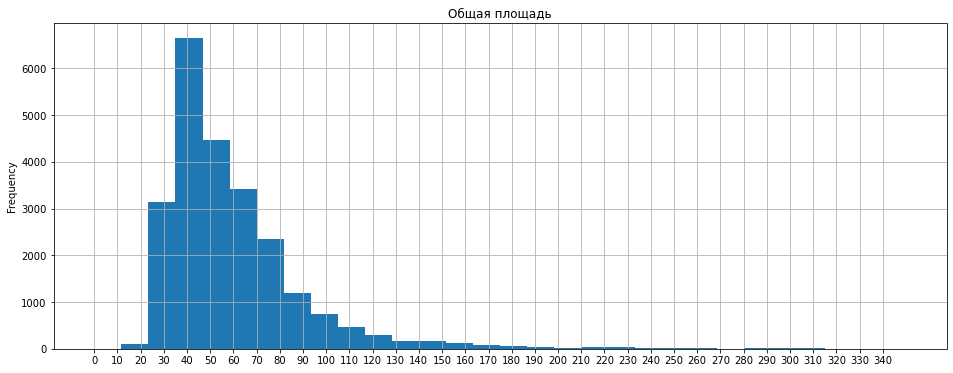

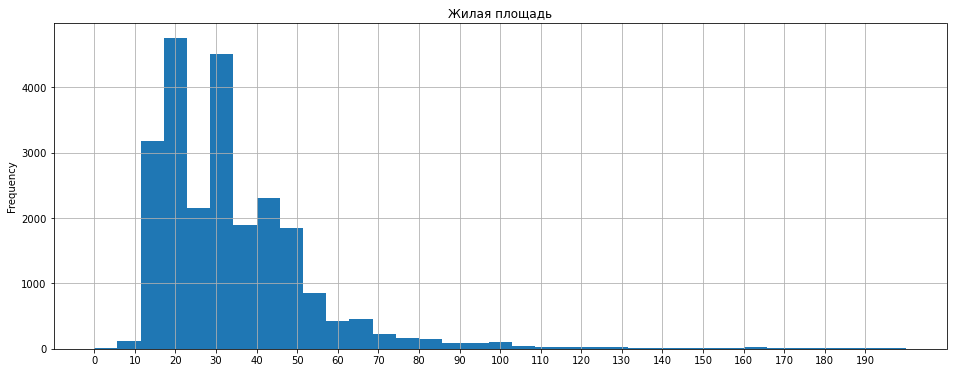

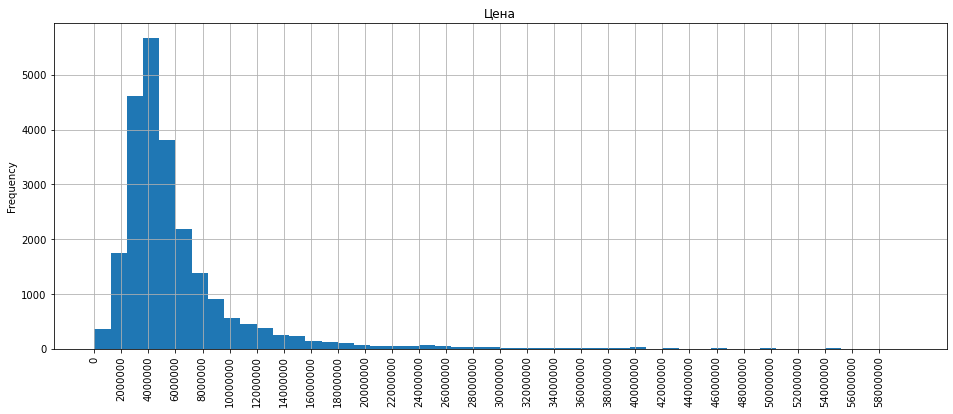

In [1194]:
plt.ticklabel_format()

data['total_area'].plot(kind='hist', grid=True, bins=30, range=(0, 350),
                        xticks=range(0, 350, 10), figsize=(16, 6), title='Общая площадь')
plt.show()

data['living_area'].plot(kind='hist', grid=True, bins=35, range=(0, 200),
                         xticks=range(0, 200, 10), figsize=(16, 6), title='Жилая площадь')
plt.show()

data['last_price'].plot(kind='hist', grid=True, bins=50, range=(0, 60_000_000),
                        xticks=range(0, 60_000_000, 2_000_000), figsize=(16, 6), title='Цена')

_ = plt.xticks(rotation=90)
_ = plt.ticklabel_format(style='plain')

plt.show()

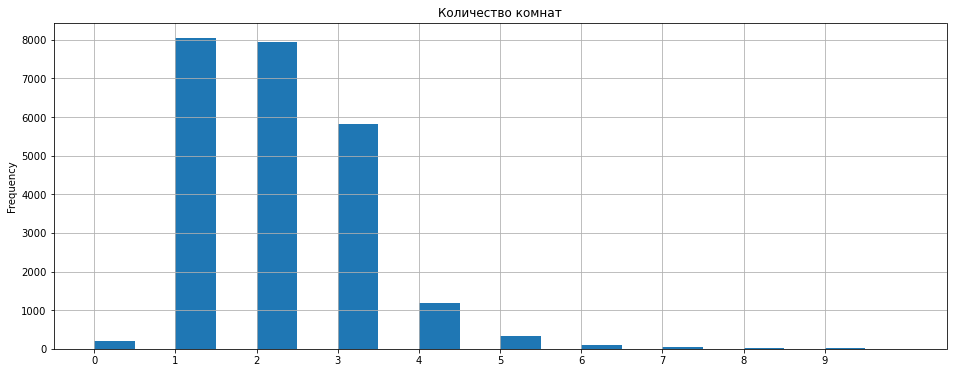

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

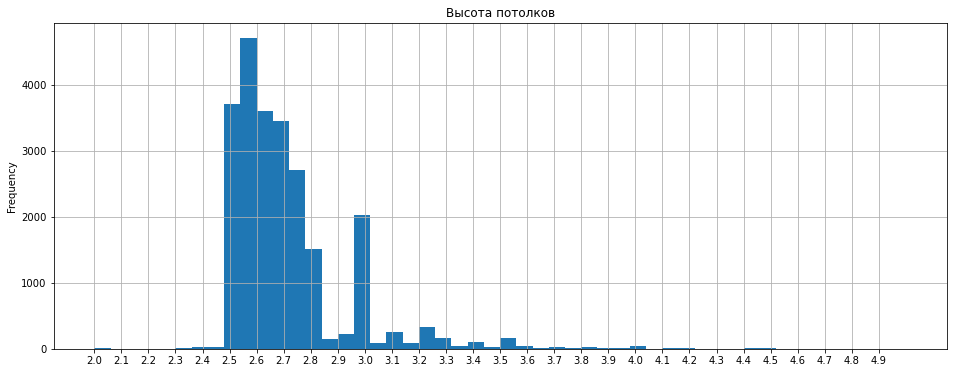

In [1195]:
import numpy as np

data['rooms'].plot(kind='hist', grid=True, bins=20, range=(0, 10),
                        xticks=range(0, 10, 1), figsize=(16, 6), title='Количество комнат')

plt.show()

data['ceiling_height'].plot(kind='hist', grid=True, bins=50, range=(2, 5),
                            xticks=np.arange(2, 5, 0.1), figsize=(16, 6), title='Высота потолков')

**Вывод**

Опишем результаты изучения каждого из параметров:

- **"общая площадь"** - среднее значение равно `60.344 м²`, медиана `52.000 м²`, что может говорить о том, что в наборе данных представлены квартиры с нетипично высокой площадью, которые "утягивают" среднее значение вверх. Среднеквадратичное отклонение равно `35.657 м²`, что выглядит довольно значительным и говорит о разнообразии общих площадей квартир в нашем наборе данных. Гистограмма выглядит унимодальной с модой около `40 м²`;


- **"жилая площадь"** - среднее значение равно `34.443 м²`, медиана `30.300 м²`, среднеквадратичное отклонение равно `21.808 м²`, в целом всё выглядит схожим с общей площадью, но распределения данного параметра наблюдаются две моды - в районе `20 м²` и `32 м²`;


- **"цена"** - среднее значение `6 543 085 ₽`, медиана `4 650 000 ₽`, их разница весьма существенна, среднеквадратичное отклонение равно `10 891 357 ₽`, что, на мой взгляд, говорит о наличии выбросов - объявлений о продаже квартир с огромной стоимостью. Мода распределения чуть больше `4 000 000 ₽`;


- **"число комнат"** - здесь ожидаемо лидируют квартиры с 1 и 2 комнатами, причём их почти равное количество в нашем наборе данных, 3-комнатных квартир примерно на ${1 \over 4}$ меньше. Любопытно наличие некоторого заметного количества квартир с 0 комнат.


- **"высота потолков"** - среднее значение `2.736 м`, медиана `2.650 м`, среднеквадратичное отклонение `0.995 м`, мода в районе `2.55 м`. Можно отметить также пик на гистограмме в районе `3 м` - возможно, что он соответствует квартирам ветхого фонда, либо какому-то элитному жилью.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Теперь изучим время продажи квартиры с помощью характеристик распределения параметра и гистограммы:

,days_exposition
count,23678.000
mean,182.061
std,204.771
min,1.000
25%,45.000
50%,124.000
75%,225.000
max,1580.000


<AxesSubplot:title={'center':'Время продажи квартиры'}, ylabel='Frequency'>

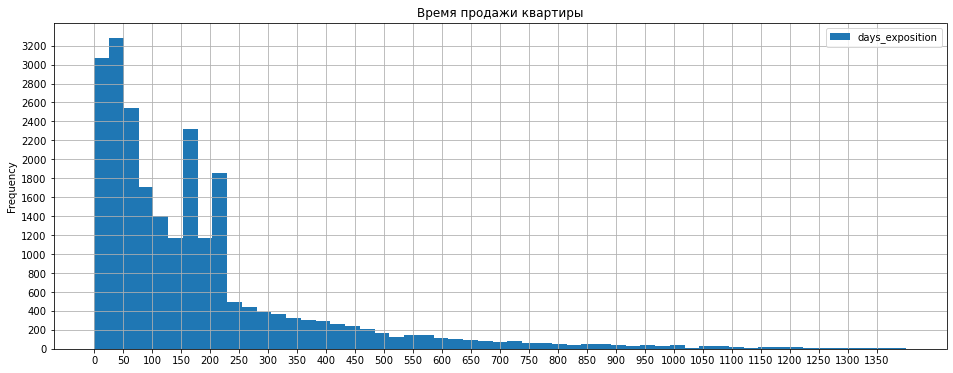

In [1196]:
display(data[['days_exposition']].describe())

data[['days_exposition']].plot(kind='hist', bins=55, range=(0, 1400), grid=True, figsize=(16, 6),
                               xticks=np.arange(0, 1400, 50),
                               yticks=np.arange(0, 3400, 200),
                               title='Время продажи квартиры')

**Вывод**

Для определения того, сколько обычно занимает продажа квартиры, можно ориентироваться на среднее (`182` дня) и медиану (`124` дня). Однако, по виду гистограммы, её длинному и низкому правому хвосту на ней можно сделать вывод, что всё же лучше ориентироваться на медиану, утверждая, что обычно продажа занимает около `124` дней. Значения, начиная с 250 дней и больше, встречается всё реже и реже.

Для определения того, в каком случае продажи прошли очень быстро, а когда необычно долго, на мой взгляд можно использовать интерквартильный размах IQR, а точнее его границы `Q1` и `Q3`:

- очень быстрыми посчитаем те продажи, которые прозошли быстрее, чем за `45` дней (только `25%` прошли быстрее);

- необычно долгими посчитаем те продажи, которые произошли дольше, чем за `225` дней (только `25%` продаж прошли дольше).

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

Определим категории, которые выглядят нуждающимися в обработке по удалению выбивающихся значений (выбросов):

In [1197]:
outlier_cleaning_cols = ["ceiling_height", "last_price", "total_area", "rooms", "living_area",
                         "kitchen_area", "airports_nearest", "city_centers_nearest", "parks_around_3000",
                         "parks_nearest", "ponds_around_3000", "ponds_nearest", "days_exposition"]

Проходя в цикле по всем категориям определённого выше списка, выполним очистку от выбросов. Под выбросом будем понимать любое значение, которое на 1.5 IQR меньше первого квартиля или на 1.5 IQR больше третьего квартиля.

Удаляем выбросы для категории "ceiling_height"


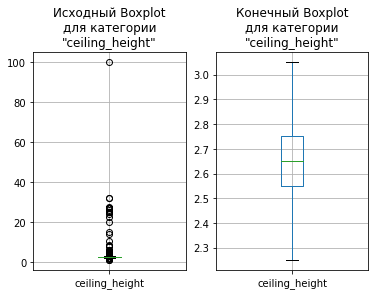

Удаляем выбросы для категории "last_price"


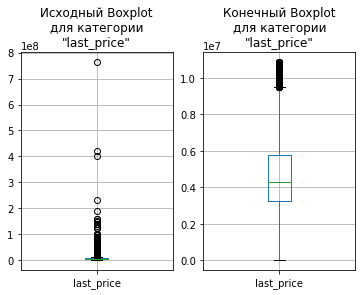

Удаляем выбросы для категории "total_area"


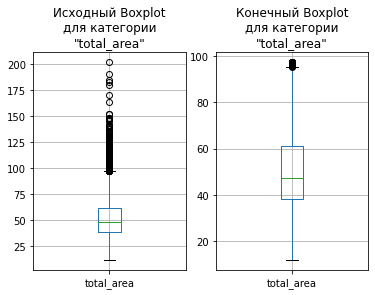

Удаляем выбросы для категории "rooms"


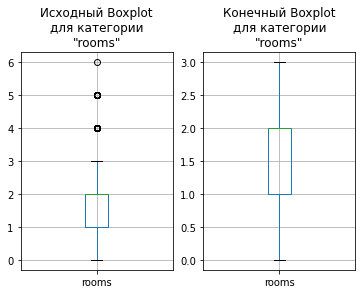

Удаляем выбросы для категории "living_area"


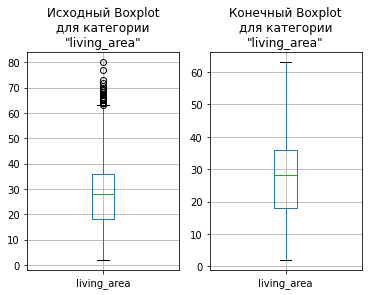

Удаляем выбросы для категории "kitchen_area"


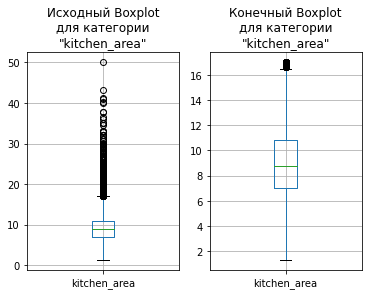

Удаляем выбросы для категории "airports_nearest"


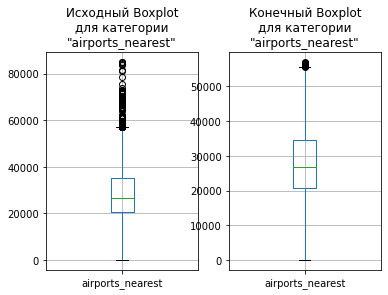

Удаляем выбросы для категории "city_centers_nearest"


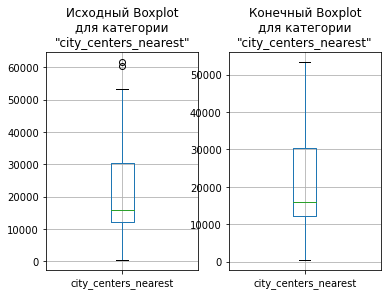

Удаляем выбросы для категории "parks_around_3000"


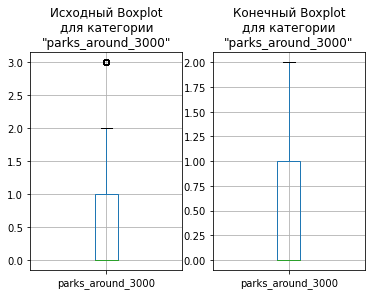

Удаляем выбросы для категории "parks_nearest"


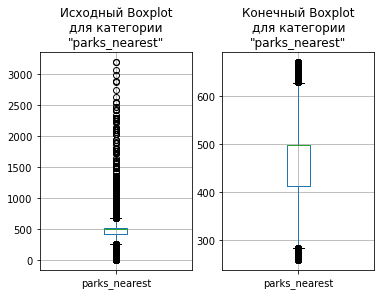

Удаляем выбросы для категории "ponds_around_3000"


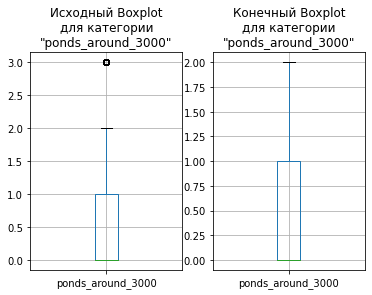

Удаляем выбросы для категории "ponds_nearest"


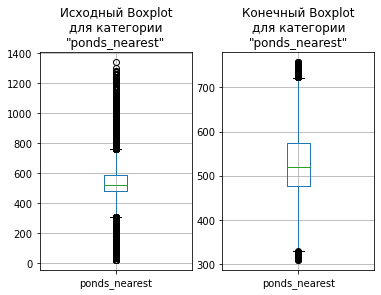

Удаляем выбросы для категории "days_exposition"


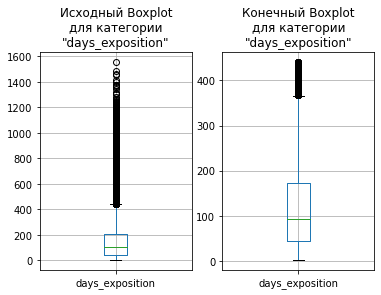

In [1198]:
outliers_statistics = dict()

for column in outlier_cleaning_cols:
    print('=' * 50)
    print(f'Удаляем выбросы для категории "{column}"')
    print('=' * 50)
    
    # Получаем первый и третий квартили
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    
    # Получаем межквартильный размах
    iqr = q3 - q1
    
    # Подсчитываем верхнюю и нижнюю границы, все объявления вне которых будем считать выбросами
    lower_bound = max(0, q1 - 1.5 * iqr)
    upper_bound = q3 + 1.5 * iqr
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    data[column].plot(kind='box', grid=True, title=f'Исходный Boxplot\nдля категории\n"{column}"', ax=ax[0])

    outliers_frame = data.query(f'{column} < @lower_bound or {column} > @upper_bound')
    outliers_statistics[column] = outliers_frame.shape[0]
    
    # Удаляем значения вне интервала от "Q1 - 1.5*IQR" до "Q3 + 1.5*IQR"
    data = data.drop(outliers_frame.index)
    
    data[column].plot(kind='box', grid=True, title=f'Конечный Boxplot\nдля категории\n"{column}"', ax=ax[1])
    plt.show()

Теперь выведем статистику о количестве выбросов, которые были отфильтрованы для каждой из категорий:

In [1199]:
sorted(outliers_statistics.items(), key=lambda kv: kv[1], reverse=True)

[('parks_nearest', 2926),
 ('ponds_nearest', 2115),
 ('last_price', 1774),
 ('ceiling_height', 1475),
 ('days_exposition', 1015),
 ('kitchen_area', 504),
 ('rooms', 503),
 ('ponds_around_3000', 414),
 ('total_area', 363),
 ('parks_around_3000', 272),
 ('airports_nearest', 229),
 ('living_area', 30),
 ('city_centers_nearest', 2)]

**Вывод**

Клетка выше демонстрирует количество выбросов для каждой из категорий, которые подверглись фильтрации. Пять наиболее затронутых выбросами категорий выглядит так:

- `parks_nearest   - 2926 выбросов`


- `ponds_nearest   - 2115 выбросов`


- `last_price      - 1774 выброса`


- `ceiling_height  - 1475 выбросов`


- `days_exposition - 1015 выбросов`

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года

Для определения влияющих на цену факторов создадим матрицу диаграмм рассеяния, в которую включим параметры с численным типом значения (которые подразумевают высокое разнообразие значений). Вся интерпретация полученных результатов будет в выводе по данному разделу.

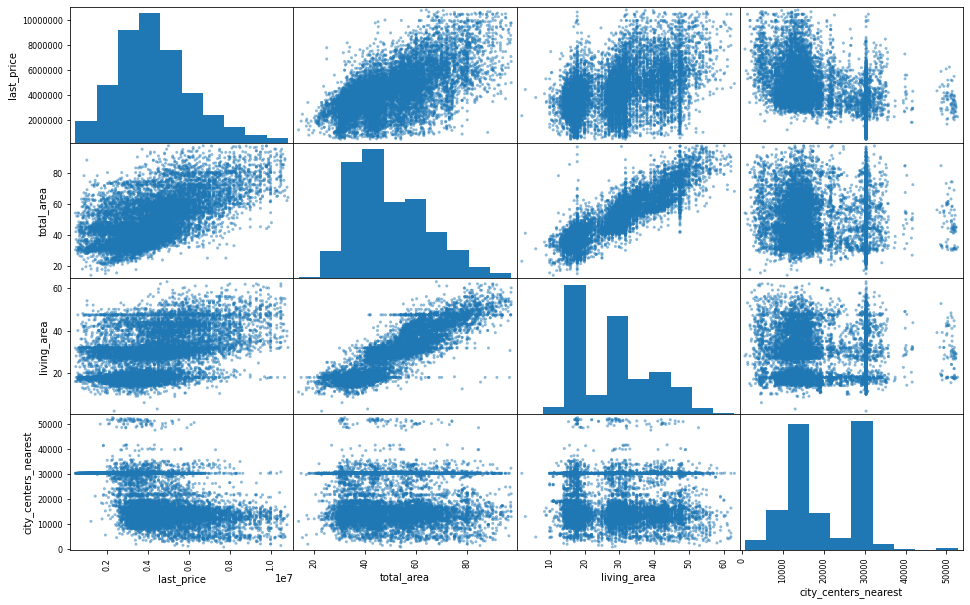

In [1219]:
def plot_scatter_matrix(df, params_list):
    """ Вспомогательная функция для построения матрицы диаграмм рассеивания по полям,
        хранящемся в списке, переданном в аргумент 'params_list'
    """
    pd.plotting.scatter_matrix(df[params_list],figsize=(16, 10))
    
plot_scatter_matrix(data, ['last_price', 'total_area', 'living_area', 'city_centers_nearest'])

Для анализа влияния категориальных параметров и численных параметров с небольшой вариативностью значений построим несколько диаграмм размаха:

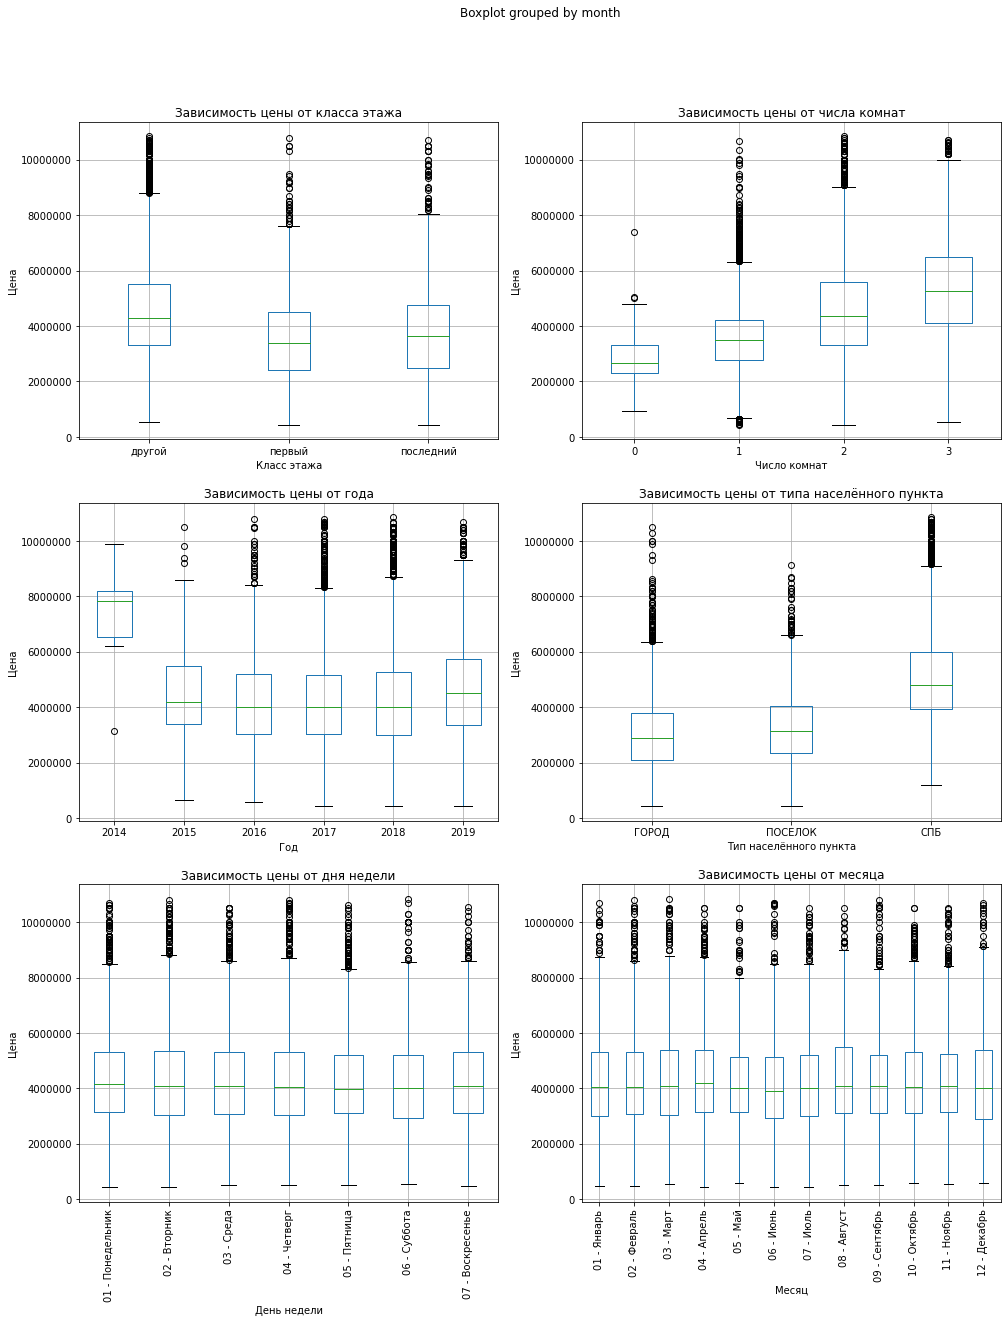

In [1201]:
def plot_boxplots(df):
    """ Вспомогательная функция для построения диаграмм размаха
    """
    
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))

    df.boxplot(column='last_price', by='floor_category', grid=True, ax=axs[0][0]).set_title(
        "Зависимость цены от класса этажа")
    df.boxplot(column='last_price', by='rooms', grid=True, ax=axs[0][1]).set_title(
        "Зависимость цены от числа комнат")
    df.boxplot(column='last_price', by='year', grid=True, ax=axs[1][0]).set_title(
        "Зависимость цены от года")
    df.boxplot(column='last_price', by='locality_type', grid=True, ax=axs[1][1]).set_title(
        "Зависимость цены от типа населённого пункта")
    df.boxplot(column='last_price', by='weekday', grid=True, ax=axs[2][0]).set_title(
        "Зависимость цены от дня недели")
    df.boxplot(column='last_price', by='month', grid=True, ax=axs[2][1]).set_title(
        "Зависимость цены от месяца")

    x_labels = ['Класс этажа', 'Число комнат', 'Год', 'Тип населённого пункта', 'День недели', 'Месяц']
    plot_index = 0
    for r in range(len(axs)):
        for c in range(len(axs[0])):
            axs[r][c].ticklabel_format(axis='y', style='plain')
            axs[r][c].set_xlabel(x_labels[plot_index])
            axs[r][c].set_ylabel('Цена')
            plot_index += 1
    
            if r == 2:
                axs[r][c].tick_params(axis='x', rotation=90)

plot_boxplots(data)

**Вывод**

Глядя на матрицу диаграмм рассеяния, можно сделать такие выводы:

- цена квартиры предсказуемо зависит от общей площади квартиры (`total_area`) - видно, как с увеличением этой площади "облако точек" имеет тенденцию смещаться вверх, в сторону увеличения цены;


- влияние жилой площади (`living_area`) на цену хоть и имеет место, но оно не настолько явное; также заметна линия точек в районе `~47 м²`, которая соответствует заполненным пропускам;


- расстояние до центра (`city_centers_nearest`) тоже оказывает некоторое, но довольно слабое влияние на цену; тем не менее, на диаграмме видно, что по мере увеличения расстояния до центра точек в верхней части графика (с высокой ценой) становится всё меньше.


Глядя на диаграммы размаха категориальных признаков, можно сделать такие выводы:


- цена зависит от класс этажа (`floor_category`) предсказуемым образом - "_первый_" этаж обладает в среднем самой низкой ценой, а "_другой_" - самой высокой;


- по мере увеличения числа комнат (`rooms`) растёт цена квартиры;


- для категории год (`year`) виден явный пик средней цены в `2014` году, прмерно `8 000 000 ₽`, после чего средняя цена уменьшилась почти в 2 раза, ближе к `4 000 000 ₽`, а в `2019` году заметно увеличение цены относительно промежутка с `2015` по `2018` года;


- для категории тип населённого пункта (`locality_type`) видно, что наибольшее значение средней цены наблюдается для квартир, расположенных в Санкт-Петербурге, тогда как квартиры, расположенные в других крупных городах Ленинградской области и в посёлках, заметно ниже, причём среднее значение для последних несколько выше;


- среднее значение цены никак не зависит от дня недели (`weekday`) или месяца выставления объявления на продажу (`month`).

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'

Делаем группировку по населённому пункту, в каждой группе подсчитываем количество объявлений (`flats_count`) и среднюю цену квадратного метра (`mean_sq_meter_cost`):

In [1202]:
top_localities = (
    data
        .groupby('locality_name')
        .agg(flats_count=('last_price', 'count'), mean_sq_meter_cost=('sq_meter_cost', 'mean'))
        .sort_values(by='flats_count', ascending=False))

top_localities

,flats_count,mean_sq_meter_cost
locality_name,,
Санкт-Петербург,6899,104193.279
поселок Мурино,492,86134.549
поселок Шушары,365,78995.486
Всеволожск,326,67161.855
Гатчина,262,68759.829
...,...,...
поселок Гончарово,1,41371.158
поселок Ромашки,1,28490.000
поселок городского типа Кондратьево,1,25000.000


Посмотрим отдельно на 10 населённых пунктов с наибольшим числом объявлений:

In [1203]:
top_localities.iloc[:10]

,flats_count,mean_sq_meter_cost
locality_name,,
Санкт-Петербург,6899,104193.279
поселок Мурино,492,86134.549
поселок Шушары,365,78995.486
Всеволожск,326,67161.855
Гатчина,262,68759.829
поселок Парголово,249,93304.336
Выборг,180,57937.965
Колпино,170,74695.944
Пушкин,157,97666.706


Определим населённые пункты с самой высокой ...

In [1204]:
top_localities.sort_values(by='mean_sq_meter_cost', ascending=False).iloc[:5]

,flats_count,mean_sq_meter_cost
locality_name,,
поселок Лисий Нос,2,113728.349
Санкт-Петербург,6899,104193.279
Кудрово,152,99916.048
Сестрорецк,42,99790.189
Пушкин,157,97666.706


... и с самой низкой стоимостью жилья:

In [1205]:
top_localities.sort_values(by='mean_sq_meter_cost').iloc[:5]

,flats_count,mean_sq_meter_cost
locality_name,,
поселок станции Свирь,2,11481.481
поселок Совхозный,2,12629.129
поселок Тесово-4,1,12931.034
поселок Житково,1,14264.264
поселок станции Лужайка,1,15000.000


**Вывод**

Как можно было ожидать, больше всего объявлений о продаже квартир - в Санкт-Петербурге (`6899` квартир), затем идут поселок Мурино (`492` квартиры) и поселок Шушары (`365` квартир).

Пять населённых пунктов с самой высокой стоимостью жилья (как цена за квадратный метр): поселок Лисий Нос (но там всего 2 квартиры, возможно, с видом на Финский залив), Санкт-Петербург, Кудрово, Сестрорецк и Пушкин.

Пять населённых пунктов с самой низкой стоимостью жилья: поселок станции Свирь, поселок Совхозный, поселок Тесово-4, поселок Житково, поселок станции Лужайка. Нужно заметить, что во всех этих населённых пунктах выставлено на продажу крайне мало квартир.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона

Создаём столбец для представления расстояния до центра в километрах:

In [1206]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000.).astype(int)

data[['city_centers_nearest', 'city_centers_nearest_km']].iloc[10:15]

,city_centers_nearest,city_centers_nearest_km
30,30371.000,30
31,12944.000,13
32,12889.000,13
34,12739.000,13
36,16461.000,16


Выбрав квартиры с Санкт-Перебурге, делаем группировку по полю расстояния до центра в километрах (`city_centers_nearest_km`), подсчитываем среднее в каждой группе, сохраняем `DataFrame` в переменную:

In [1208]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

km_cost_frame = data_spb.groupby('city_centers_nearest_km').agg(km_cost=('sq_meter_cost', 'mean'))

km_cost_frame

,km_cost
city_centers_nearest_km,
1,122594.333
2,128300.602
3,109232.062
4,123247.329
5,127172.601
6,118834.091
7,110889.778
8,109464.728
9,105366.363


Теперь соединим две таблицы, `data_spb` и `km_cost_frame` по полю `city_centers_nearest_km` с помощью `DataFrame.merge()`:

In [1209]:
data_spb = data_spb.merge(km_cost_frame, left_on='city_centers_nearest_km', right_on='city_centers_nearest_km')
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition_calculated,sq_meter_cost,weekday,month,year,floor_category,living_by_total_ratio,kitchen_by_total_ratio,city_centers_nearest_km,km_cost
0,18,5400000.000,61.000,2017-02-26,3,2.500,9,43.600,7,False,...,225.777,88524.590,07 - Воскресенье,02 - Февраль,2017,другой,0.710,0.110,15,102111.919
1,3,6800000.000,76.000,2015-10-01,2,2.750,23,39.000,18,False,...,172.027,89473.684,04 - Четверг,10 - Октябрь,2015,другой,0.510,0.200,15,102111.919
2,15,6300000.000,46.500,2017-03-06,1,2.700,13,17.893,13,False,...,156.542,135483.871,01 - Понедельник,03 - Март,2017,последний,0.380,0.250,15,102111.919
3,19,4950000.000,44.000,2018-02-27,2,2.700,23,21.000,19,False,...,172.027,112500.000,02 - Вторник,02 - Февраль,2018,другой,0.480,0.340,15,102111.919
4,17,6500000.000,67.400,2017-05-11,3,2.650,17,40.100,6,False,...,225.777,96439.169,04 - Четверг,05 - Май,2017,другой,0.590,0.150,15,102111.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,10,5461890.000,50.340,2018-10-10,2,2.550,5,21.000,1,False,...,172.027,108500.000,03 - Среда,10 - Октябрь,2018,первый,0.420,0.140,26,91515.985
6895,1,3300000.000,36.000,2018-04-17,1,2.550,5,16.000,4,False,...,156.542,91666.667,02 - Вторник,04 - Апрель,2018,другой,0.440,0.330,26,91515.985
6896,6,2250000.000,32.000,2018-02-27,1,2.700,2,16.500,2,False,...,156.542,70312.500,02 - Вторник,02 - Февраль,2018,последний,0.520,0.220,27,70312.500
6897,10,4850000.000,62.000,2017-05-16,3,2.550,5,35.700,1,False,...,225.777,78225.806,02 - Вторник,05 - Май,2017,первый,0.580,0.120,29,67601.275


In [1111]:
data_spb_plot = (
    data_spb[['city_centers_nearest_km', 'km_cost']]
        .drop_duplicates()
        .sort_values(by='city_centers_nearest_km'))

data_spb_plot

,city_centers_nearest_km,km_cost
6875,1,122594.333
6863,2,128300.602
5448,3,109232.062
6291,4,123247.329
5484,5,127172.601
5629,6,118834.091
4865,7,110889.778
3459,8,109464.728
4600,9,105366.363
3109,10,107819.179


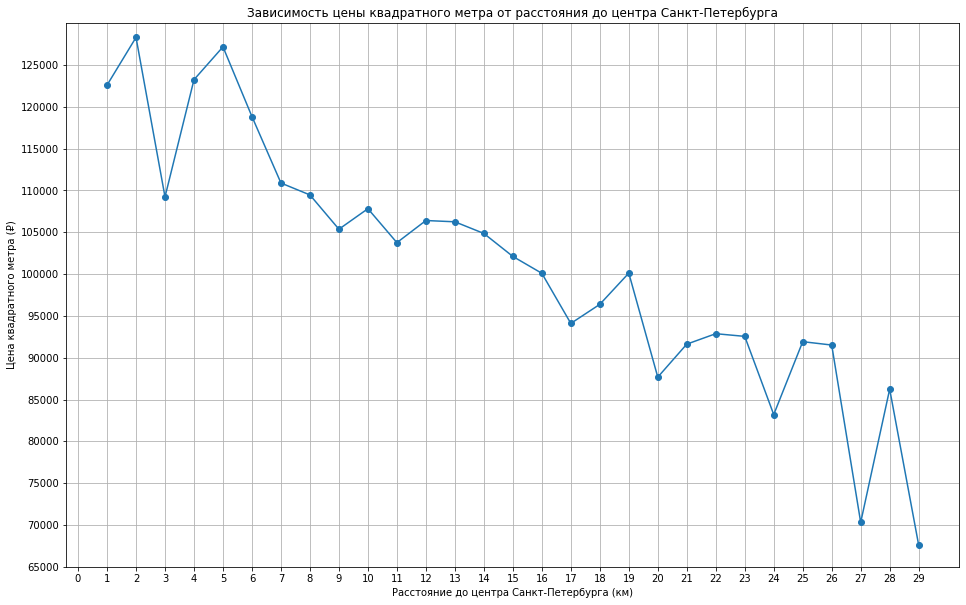

In [1112]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(data_spb_plot['city_centers_nearest_km'], data_spb_plot['km_cost'], '-o')
ax.set_title('Зависимость цены квадратного метра от расстояния до центра Санкт-Петербурга')
ax.set_xlabel('Расстояние до центра Санкт-Петербурга (км)')
ax.set_ylabel('Цена квадратного метра (₽)')
ax.set_xticks(range(0, 30, 1))
ax.set_yticks(range(0, 130000, 5000))
ax.set_ylim(ymin=65000, ymax=130000)
ax.grid()

**Вывод**

Судя по графику выше, значительный излом происходит после 2-го и после 5-го километров.

Однако, после падения на 3 километре, график резко идёт вверх на 4 и 5 километрах, что может говорить о том, что значение для 3 километров не очень репрезентативно.

А после падения за 5 километром график больше не устремляется вверх, так что будем считать именно 5-ый километр переломным, и тем самым **отнесём к центральной зоне Санкт-Петербурга те квартиры, которые расположены в пределах 5 километров от центра**.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Сохраним в `data_spb_center` те квартиры из Санкт-Петербурга, которые попадают в центральную зону:

In [1221]:
data_spb_center = data_spb.query('city_centers_nearest_km <= 5')
data_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition_calculated,sq_meter_cost,weekday,month,year,floor_category,living_by_total_ratio,kitchen_by_total_ratio,city_centers_nearest_km,km_cost
5448,8,4800000.000,40.000,2017-11-18,2,2.800,3,29.000,2,False,...,172.027,120000.000,06 - Суббота,11 - Ноябрь,2017,другой,0.720,0.150,3,109232.062
5449,2,7900000.000,71.800,2017-08-23,3,3.000,5,38.700,1,False,...,225.777,110027.855,03 - Среда,08 - Август,2017,первый,0.540,0.170,3,109232.062
5450,11,5650000.000,46.300,2017-03-13,2,3.000,6,28.800,2,False,...,172.027,122030.238,01 - Понедельник,03 - Март,2017,другой,0.620,0.190,3,109232.062
5451,11,6950000.000,77.000,2018-02-01,3,2.550,5,40.000,3,False,...,225.777,90259.740,04 - Четверг,02 - Февраль,2018,другой,0.520,0.170,3,109232.062
5452,6,6000000.000,48.700,2018-09-27,1,3.000,6,24.200,6,False,...,156.542,123203.285,04 - Четверг,09 - Сентябрь,2018,последний,0.500,0.210,3,109232.062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,7,6700000.000,54.000,2017-11-08,3,2.800,3,36.000,2,False,...,225.777,124074.074,03 - Среда,11 - Ноябрь,2017,другой,0.670,0.190,2,128300.602
6875,9,10500000.000,85.000,2018-09-05,3,3.000,4,53.000,1,False,...,225.777,123529.412,03 - Среда,09 - Сентябрь,2018,первый,0.620,0.110,1,122594.333
6876,9,7700000.000,54.000,2018-07-10,2,2.550,5,28.000,2,False,...,172.027,142592.593,02 - Вторник,07 - Июль,2018,другой,0.520,0.190,1,122594.333
6877,0,5300000.000,46.800,2016-05-04,2,3.000,6,25.000,3,False,...,152.340,113247.863,03 - Среда,05 - Май,2016,другой,0.530,0.130,1,122594.333


Анализируем квартиры в центре - строим диаграммы рассеяния:

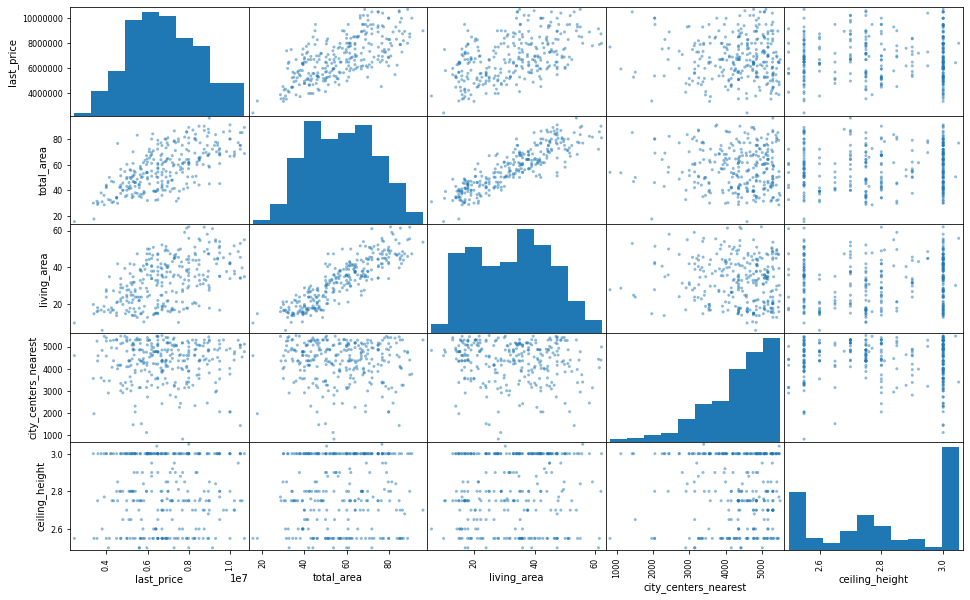

In [1223]:
plot_scatter_matrix(
    data_spb_center, ['last_price', 'total_area', 'living_area', 'city_centers_nearest', 'ceiling_height'])

Анализируем квартиры в центре - строим диаграммы размаха:

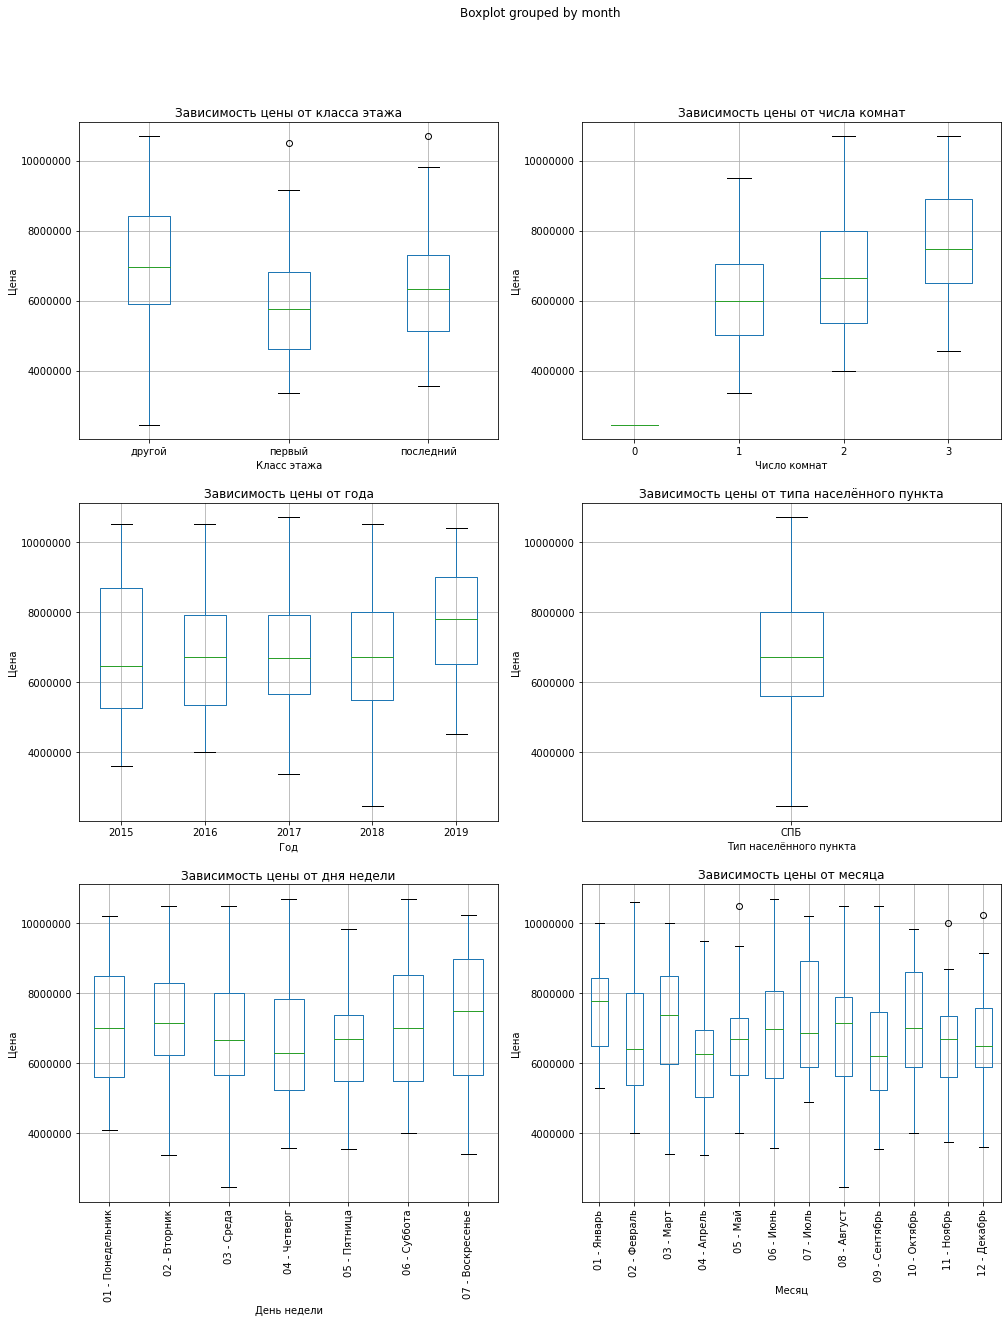

In [1216]:
plot_boxplots(data_spb_center)

**Вывод**

Глядя на матрицу диаграмм рассеяния для квартир в центральной зоне Санкт-Петербурга, можно сделать такие выводы:


- заметна корреляция между общей площадью (`total_area`) и ценой (`last_price`) - с увеличением общей площади следом увеличивается и цена;


- по удалённости от центра (`city_centers_nearest`), больше квартир с расстоянием от `3` до `5` км, причём цена сильно не зависит от точного расстояния до центра - можно предположить, что точное размещение уже не так важно по сравнению с тем фактом, что это уже центр;


- видна значительная доля квартир с высотой потолков (`ceiling_height`) в райное `3` метров, причём эта доля имеет место и среди более дешёвых, и среди более дорогих квартир.


Глядя на диаграммы размаха категориальных признаков для квартир в центральной зоне Санкт-Петербурга, можно сделать такие выводы:


- зависимость цены от категории этажа (`floor_category`) такая же, как и для всех квартир - "_первый_" этаж самый дешёвый, "_другой_" - самый дорогой;


- зависимость цены от числа комнат (`rooms`) такая же, как и для всех квартир (чем больше комнат в квартире, тем выше её цена);


- заметна тенденция ежегодного увеличения стоимости квартир (`year`);


- более дорогие квартиры размещают по воскресным дням, а более дешёвые - по четвергам (категория `weekday`);


- более дорогие квартиры размещают в январе, а более дешёвые - в сентябре (категория `month`).

## Общий вывод

В центральной зоне находятся квартиры, расположенные в радиусе 5 км от центра Санкт-Петербурга.

### Для квартир в центральной зоне
Стоимость квартир в центральной зоне ожидаемо зависит в первую очередь от общей площади, количества комнат и этажа. Удалённость от центра для таких квартир не оказывает значительного влияния на цену. Также заметно существенное количество квартир с высотой потолков около 3 м. Кроме того, наблюдается интересная взаимосвязь между ценой и днём недели и месяцем, о чём было отмечено выше.

### Для квартир в целом
Среднее значение цены никак не зависит от дня недели или месяца размещения объявления (такая тенденция имеет место только для квартир в центральной зоне). Общая площадь, количество комнат и этаж также влияют на стоимость ожидаемым образом. Самая высокая стоимость квартир была отмечена в 2014 году, далее цены снижались.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод